# Tutorial 9b - Crystal properties of lithium niobate

Continuing the study of bulk material elastic properties from the previous tutorial, let's take a look at the orientational dependence of lithium niobate, an increasingly important material in SBS.

The numerical values for the $\mathrm{LiNbO}_3$ material properties  are taken from [Rodrigues et al, JOSA B 40, D56 (2023)](https://doi.org//10.1364/JOSAB.482656).


In [ ]:
%load_ext autoreload
%autoreload 3

import sys
import numpy as np
from IPython.display import Image, display, HTML

sys.path.append("../backend")
import materials

def img_pair(fn1, fn2, cap1='', cap2='', wid1=300, wid2=300):
    html_string = f"""
    <div style="display: flex; justify-content: center; align-items: flex-start;">
        <div style="margin-right: 10px;">
            <img src="{fn1}" width="{wid1}px">
            <p style="text-align: center;">{cap1}</p>
        </div>
        <div>
            <img src="{fn2}" width="{wid2}px">
            <p style="text-align: center;">{cap2}</p>
        </div>
    </div>"""

    display(HTML(html_string))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Stiffness tensor under crystal rotations



### The default orientation:  $y$-cut

To review, in NumBAT, the *laboratory* axes $x$, $y$ and $z$ are fixed. Propagation always occurs along the $z$ direction and the vertical direction out of the substrate is always along $y$.

The *crystal* axes of a material, denoted $X$, $Y$ and $Z$, or $\hat{c}_x$, $\hat{c}_y$, $\hat{c}_z$ can be rotated.

The material is defined in the definition json files with the crystal and laboratory axes aligned, and is thus in $y$-cut form: the crystal $\hat{c}_y$ axis points up out of the waveguide, with the crystal symmetry axis $\hat{c}_z$ lying along the propagation direction $z$.


We'll look at this for a material file describing lithium niobate. (Remember that NumBAT, the same material can have multiple definition files to allow exact comparison with literature references.)

In [41]:
mat_LiNbO3 = materials.make_material("LiNbO3_2023_Rodrigues")
mat_LiNbO3_y = mat_LiNbO3  # for naming convenience later

Here is the default orientation as just described with the crystal and laboratory axes aligned.


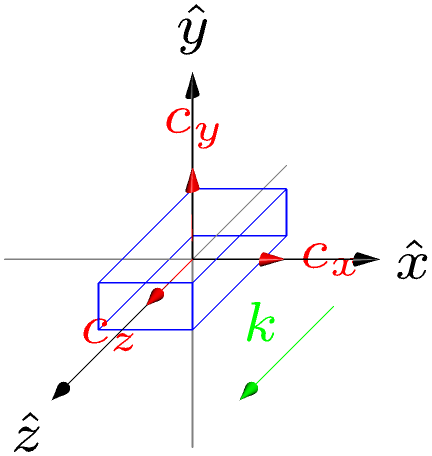

In [22]:
pref='tmp_LiNbO3'
fnimg = mat_LiNbO3.make_crystal_axes_plot(pref+'-ycut')
display(Image(fnimg, width=300))

The crystal properties show that for this orientation the two shear modes for propagation along $z$ are degenerate:

In [6]:
print(mat_LiNbO3.elastic_properties())

Elastic properties of material LiNbO3_2023_Rodrigues
  Density:        4650.000 kg/m^3
  Ref. index:     2.2100+0.0000j 
  Crystal class:  Trigonal
  Crystal group:  no sym
  Stiffness c_IJ:
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[198.83   54.64   68.23    7.83    0.      0.   ]
     [ 54.64  198.83   68.23   -7.83    0.      0.   ]
     [ 68.23   68.23  235.71    0.      0.      0.   ]
     [  7.83   -7.83    0.     59.86    0.      0.   ]
     [  0.      0.      0.      0.     59.86    7.83 ]
     [  0.      0.      0.      0.      7.83   72.095]]

  Wave mode 1: v_p=7.1197 km/s,  |v_g|=7.1197 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  7.1197] km/s
  Wave mode 2: v_p=3.5879 km/s,  |v_g|=3.6185 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[ 0.0000  0.4693  3.5879] km/s
  Wave mode 3: v_p=3.5879 km/s,  |v_g|=3.6185 km/s,  u_j=[ 0.0000  1.0000  0.0000],  v_g=[ 0.0000 -0.4693  3.5879] km/s


This is not true if the wave vector direction in the $x$-$z$ plane is varied.

By solving the Christoffel equation as the wave vector rotates in the $x$-$z$ plane we can map out curves of the phase velocity, inverse phase velocity (or "slowness"), and the magnitude of the group velocity $|v_g(\kappa)|$.

The faint circular lines mark radial velocities at 1 km/s intervals.


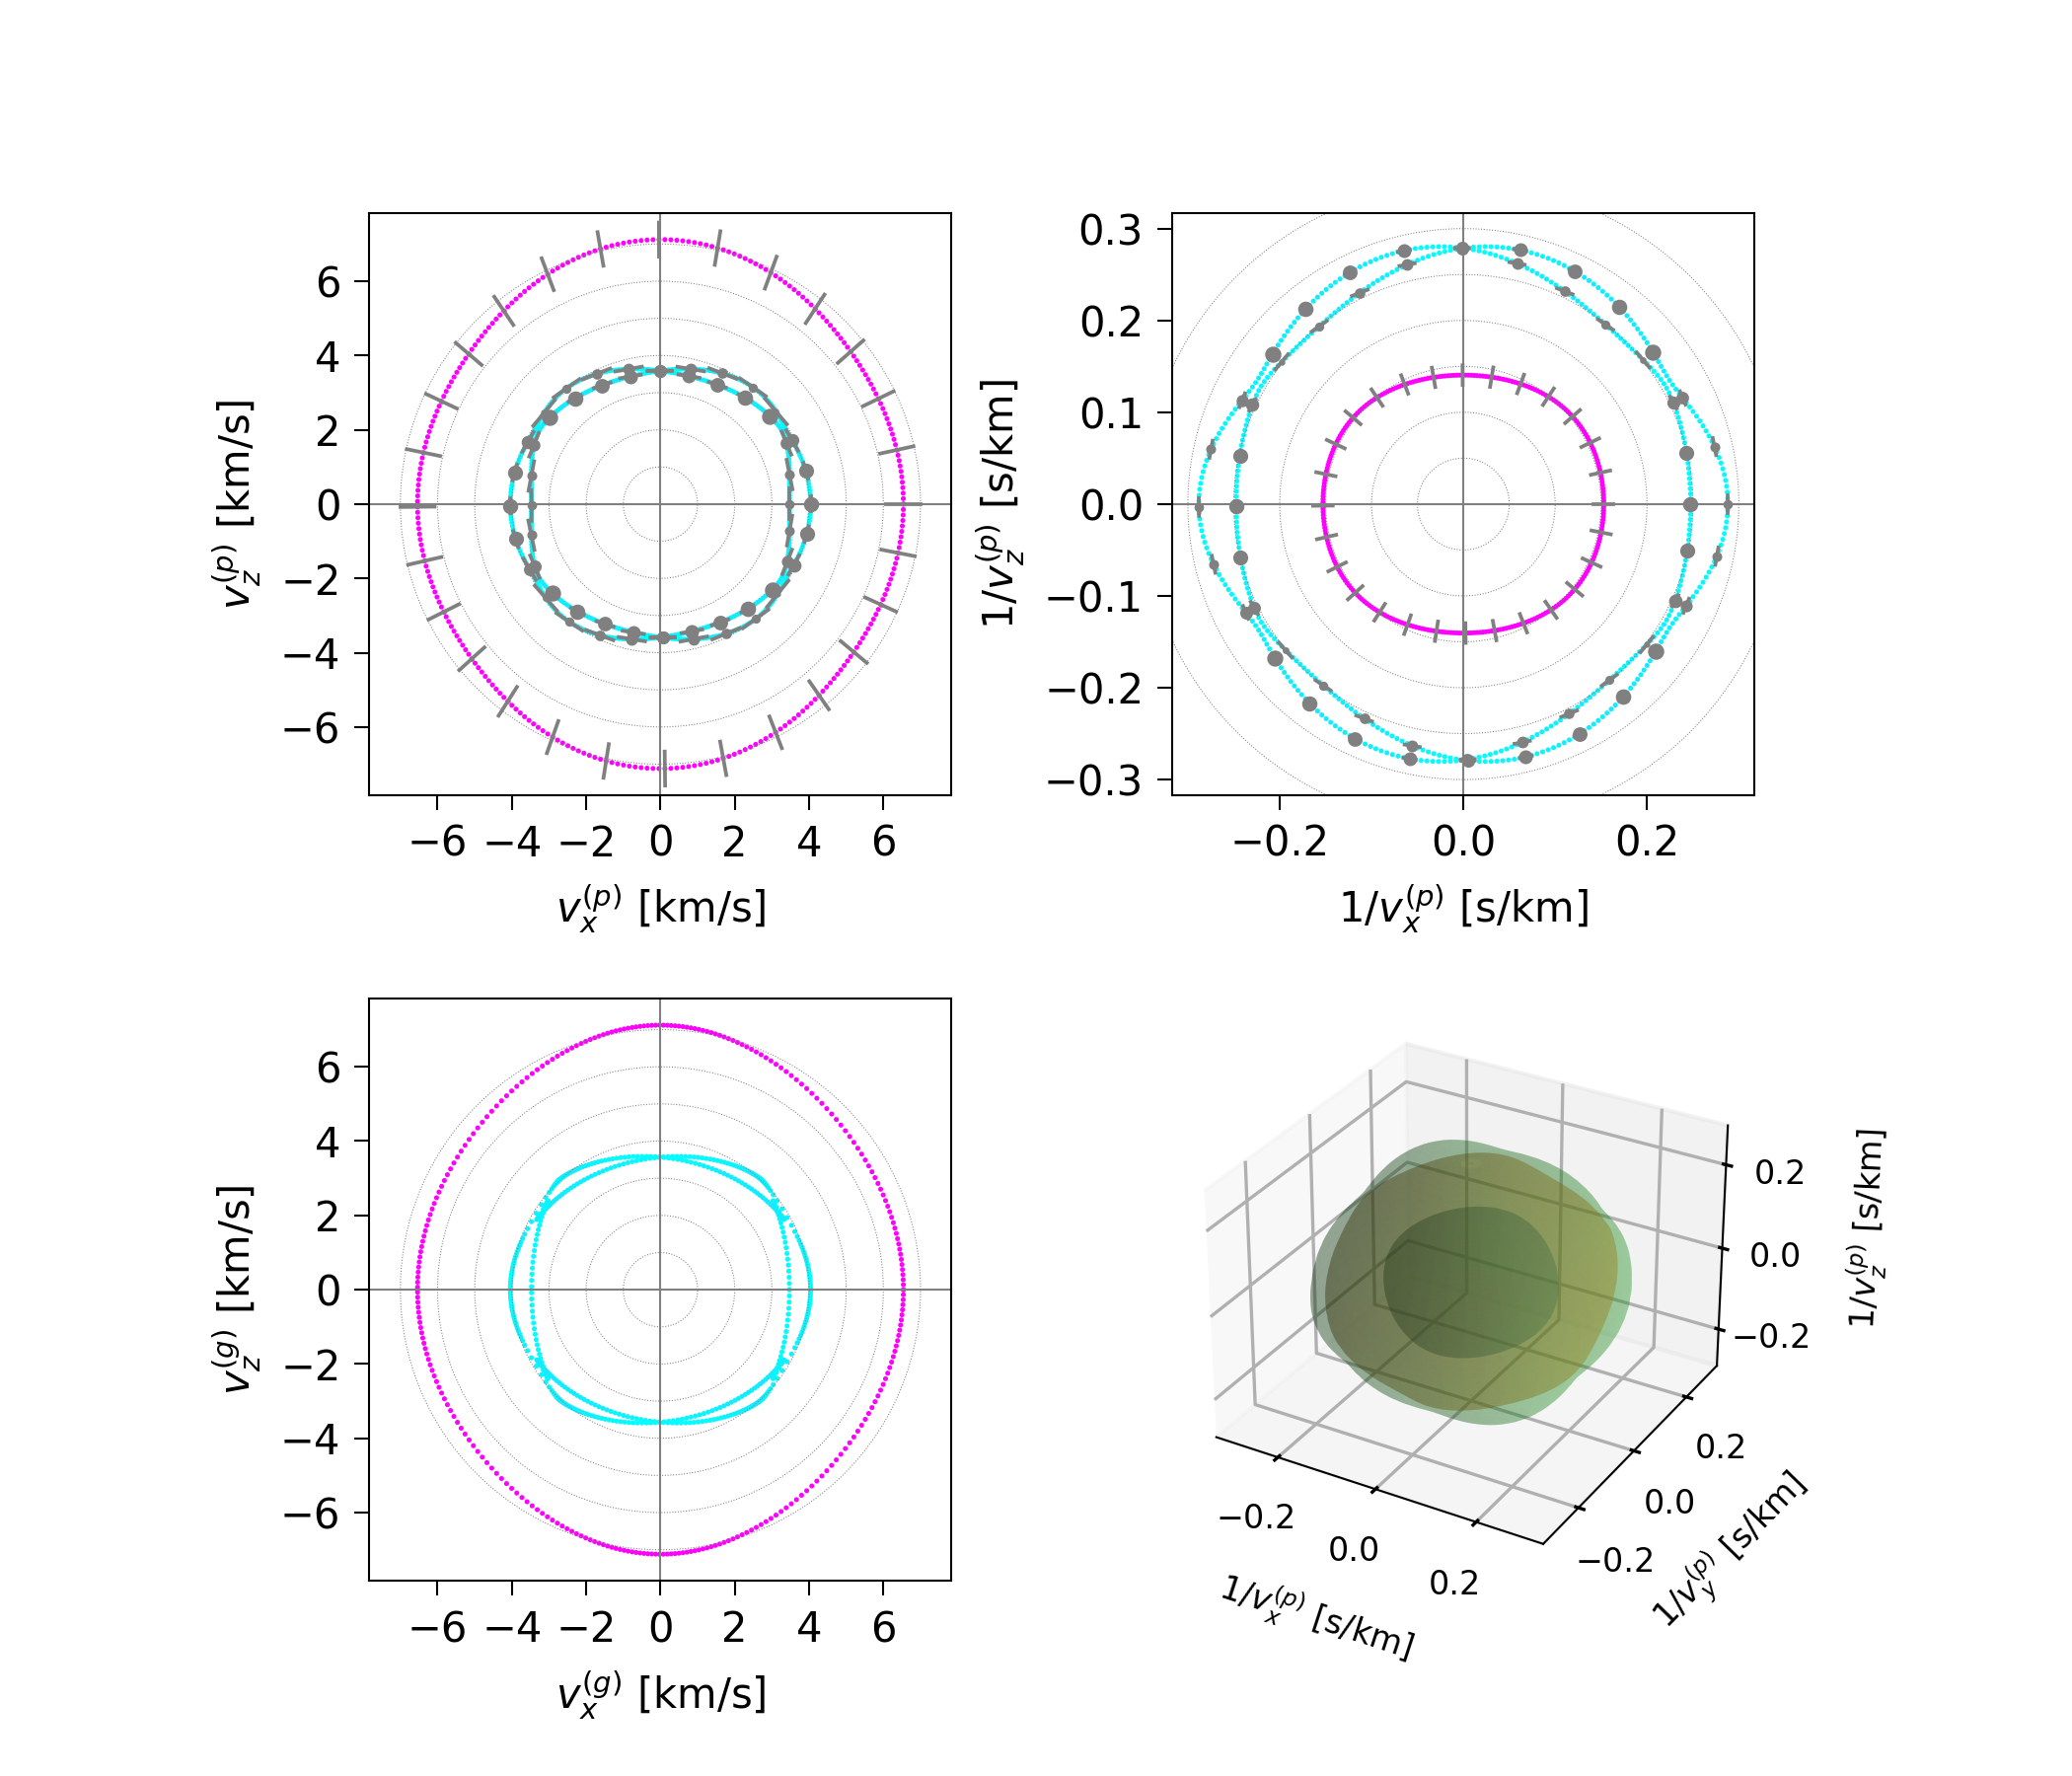

In [23]:
imgdisp_y = mat_LiNbO3.plot_bulk_dispersion(pref+'-ycut')
display(Image(imgdisp_y,width=500))

For this material, it is quite hard to see the difference between the phase and group velocity plots. That is more obvious in some other materials.

These plots can also be generated without the polarisation state markers:

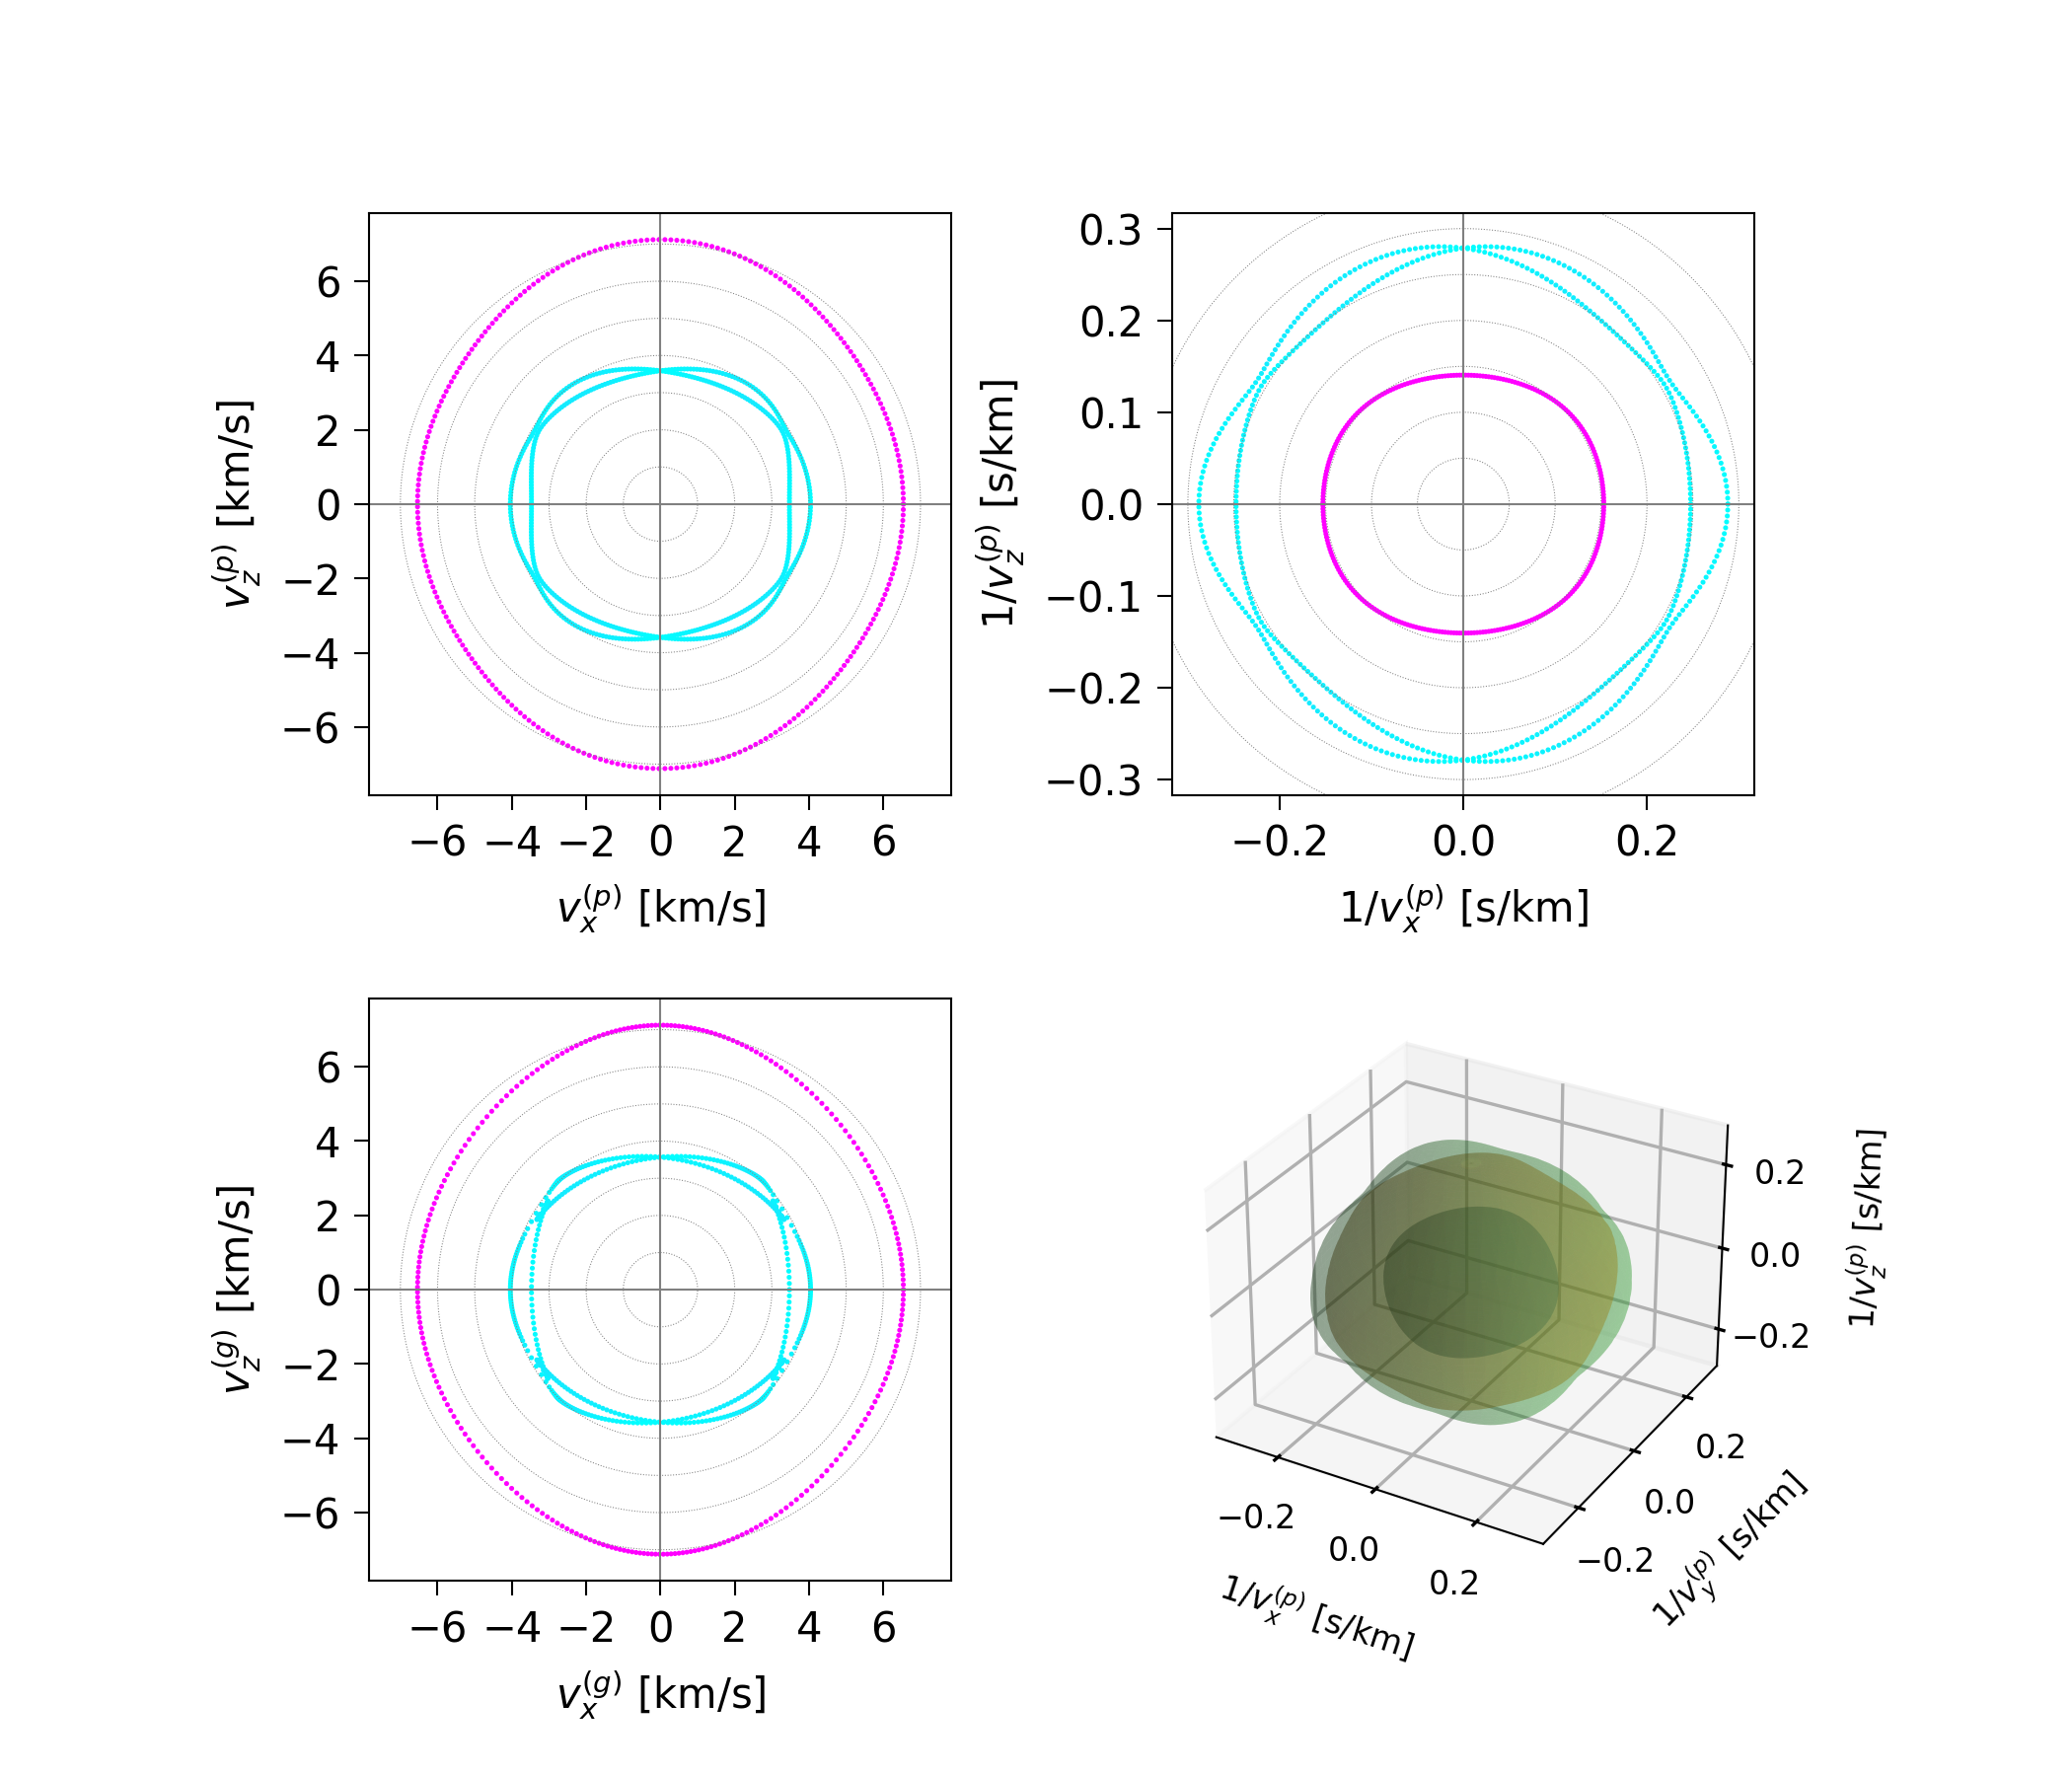

In [ ]:
imgdisp_yb = mat_LiNbO3.plot_bulk_dispersion(pref, show_poln=False)
display(Image(imgdisp_yb,width=500))

### The $z$-cut orientation

Now let's rotate the starting crystal so the primary crystal symmetry axis $\hat{c}_z$ points upwards along $\hat{y}$, 
with the $\hat{c}_y$ axis along $-\hat{z}$. This corresponds to Fig. 2a in Rodrigues et al.

In [24]:
mat_LiNbO3_z = mat_LiNbO3.copy()
mat_LiNbO3_z.set_orientation('z-cut')

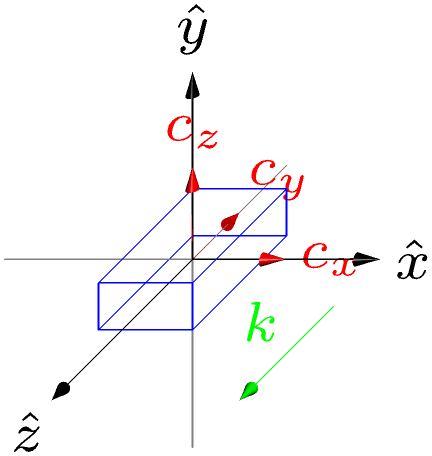

In [25]:
fimg = mat_LiNbO3_z.make_crystal_axes_plot(pref+'-zcut')
display(Image(fimg, width=300))

With the 6-fold symmetry axis $Z$ pointing up along $y$, the dispersion cuts in the $x$-$z$ plane now display the full 6-fold symmetry associated with the trigonal structure of lithium niobate:

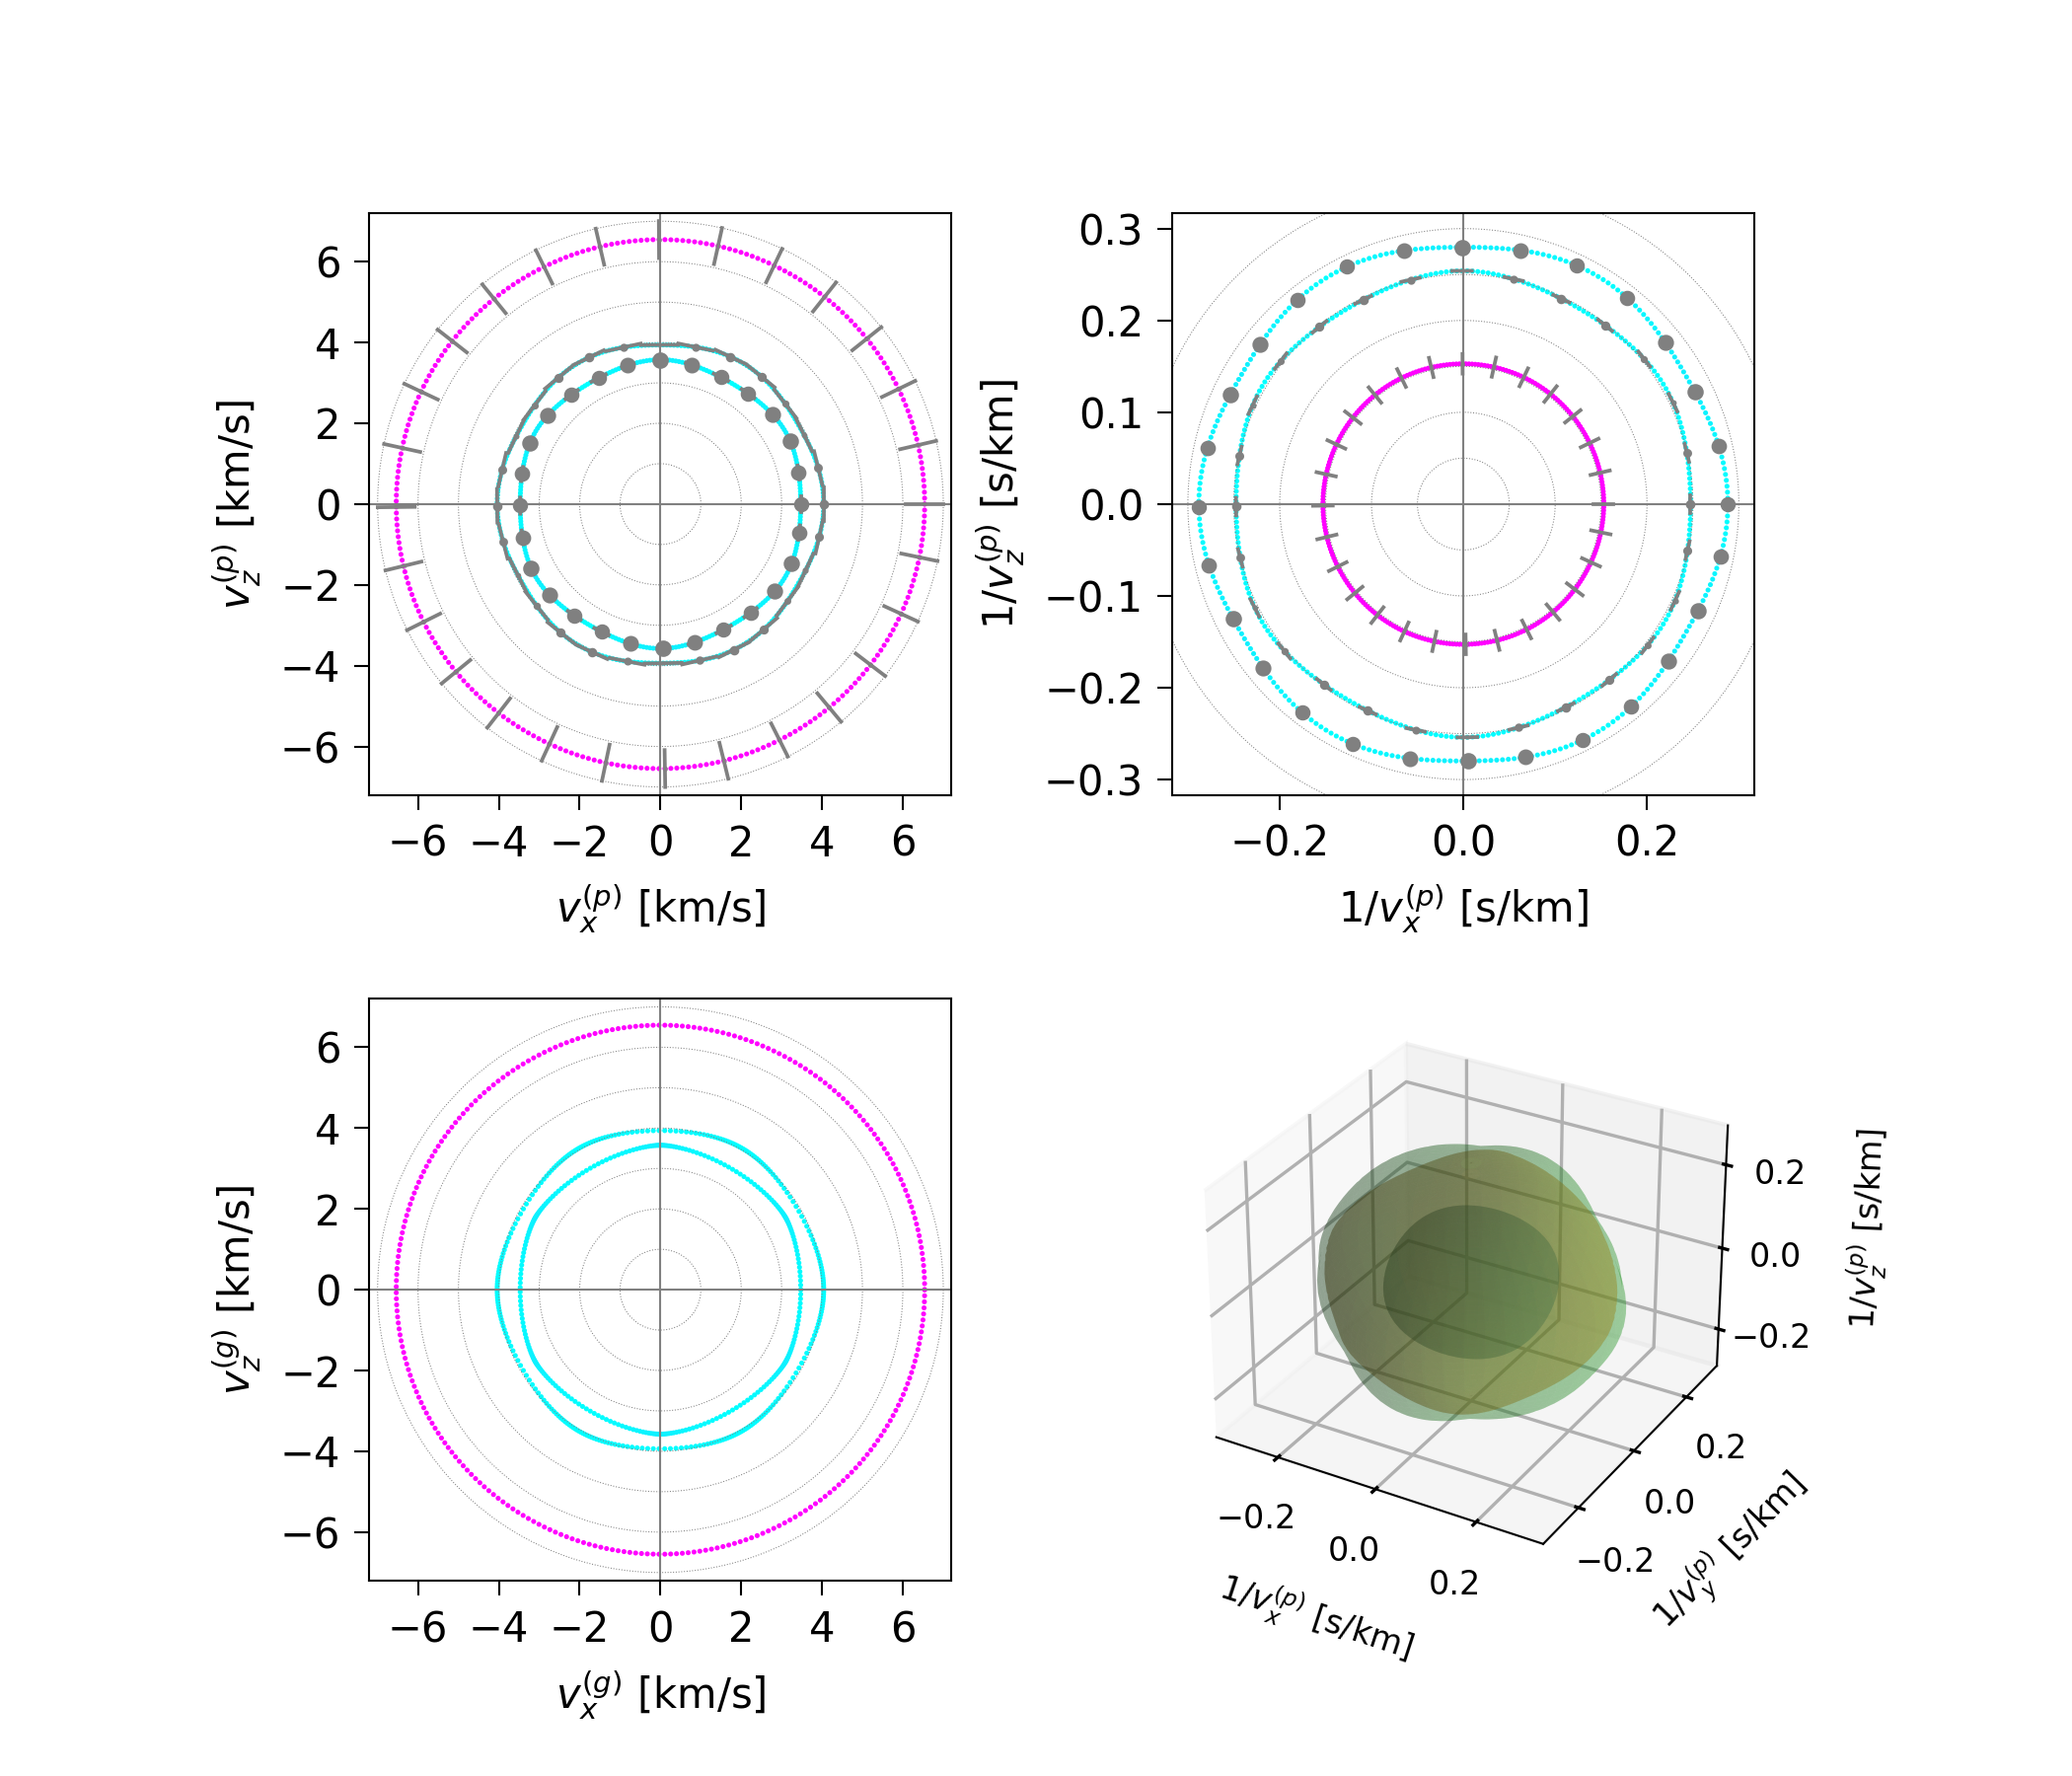

In [27]:
imgdisp_z = mat_LiNbO3_z.plot_bulk_dispersion(pref+'-zcut')
display(Image(imgdisp_z,width=500))

### The $x$-cut orientation

For completeness, we can look at the $x$-cut properties:

In [ ]:
mat_LiNbO3_x =  mat_LiNbO3.copy()
mat_LiNbO3_x.set_orientation('x-cut')

print(mat_LiNbO3_x.elastic_properties())

Elastic properties of material LiNbO3_2023_Rodrigues
  Density:        4650.000 kg/m^3
  Ref. index:     2.2100+0.0000j 
  Crystal class:  Trigonal
  Crystal group:  no sym
  Stiffness c_IJ:
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[ 1.9883e+02  5.4640e+01  6.8230e+01 -1.4383e-15  7.8300e+00  0.0000e+00]
     [ 5.4640e+01  1.9883e+02  6.8230e+01  1.4383e-15 -7.8300e+00 -1.6552e-47]
     [ 6.8230e+01  6.8230e+01  2.3571e+02  0.0000e+00  0.0000e+00  0.0000e+00]
     [-1.4383e-15  1.4383e-15  0.0000e+00  5.9860e+01  0.0000e+00 -7.8300e+00]
     [ 7.8300e+00 -7.8300e+00  0.0000e+00  0.0000e+00  5.9860e+01 -1.4383e-15]
     [ 0.0000e+00 -4.2352e-31  0.0000e+00 -7.8300e+00 -1.4383e-15  7.2095e+01]]

  Wave mode 1: v_p=7.1197 km/s,  |v_g|=7.1197 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  7.1197] km/s
  Wave mode 2: v_p=3.5879 km/s,  |v_g|=3.6185 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[ 0.4693 -0.0000  3.5879] km/s
  Wave mode 3: v_p=3.5879 km/s,  |v_g|=3.6185 

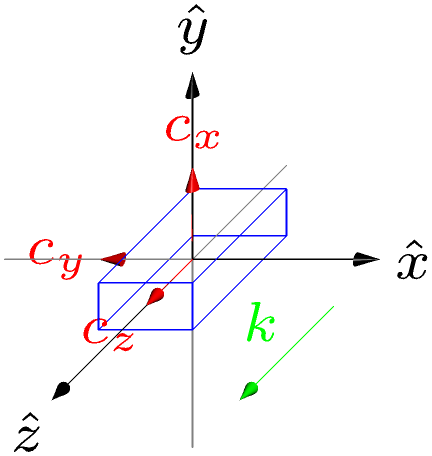

In [28]:
fnimg = mat_LiNbO3_x.make_crystal_axes_plot(pref+'-xcut')
display(Image(fnimg,width=300))

The distinction between the $x$-cut and $y$-cut dispersion is subtle, and it helpful to plot them side by side.

In [34]:
html_code = f"""
<div style="display: flex; justify-content: center; align-items: flex-start;">
    <div style="margin-right: 10px;">
        <img src="tmp_LiNbO3-xcut-bulkdisp.png" width="500px">
        <p style="text-align: center;">X cut</p>
    </div>
    <div>
        <img src="tmp_LiNbO3-ycut-bulkdisp.png" width="500px">
        <p style="text-align: center;">Y cut</p>
    </div>
</div>
"""
display(HTML(html_code));



## Photoelastic response

Now let's consider the influence of crystal orientation on the photoelastic coupling.

The photoelastic tensor elements $p_{ijkl}$ also change in value as the crystal is rotated. 
Once again, we can plot the coefficients in the lab frame coordinates, as a crystal of given orientation is imagined to be rotated around the $y$ axis.

The desired elements of the tensor are specified in the Voigt notation $p_{IJ}$.

As with the results above, the $Z$-cut crystal exhibits the 3-fold trigonal symmetry, while the other two cuts have more complex behaviour.

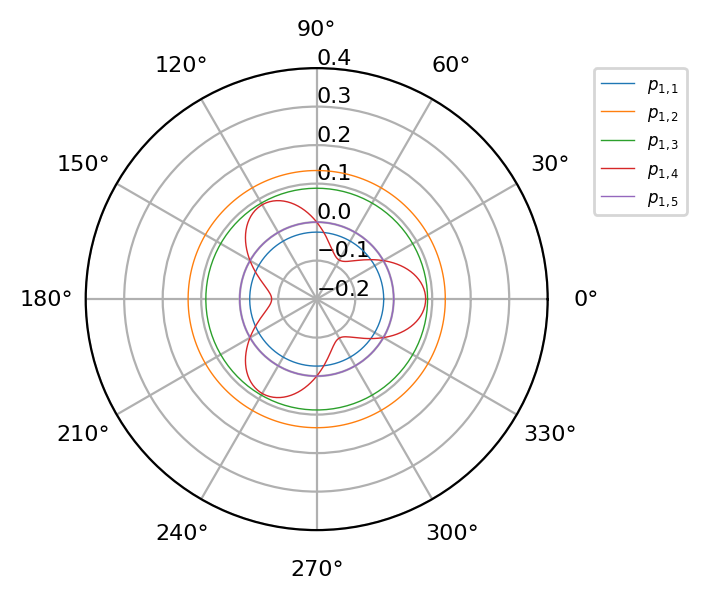

In [50]:
mat_LiNbO3_z.plot_photoelastic_IJ(pref, ("11","12", "13", "14", "15"))

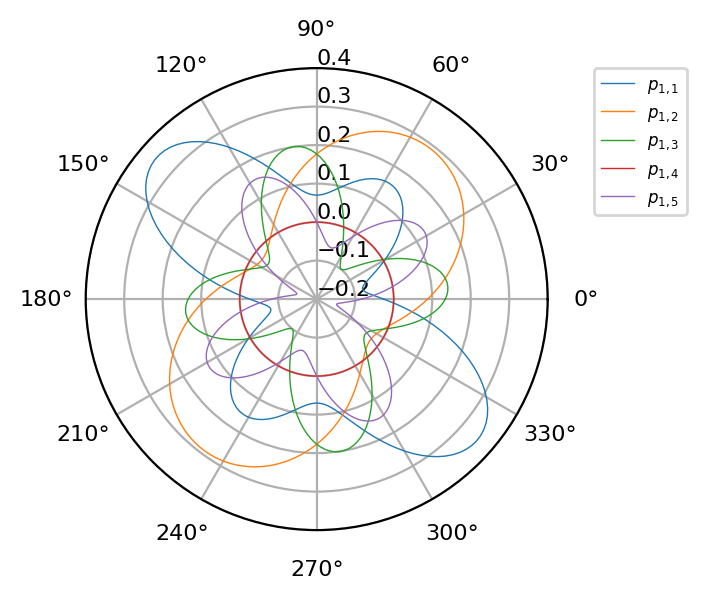

In [51]:
mat_LiNbO3_x.plot_photoelastic_IJ(pref, ("11","12", "13", "14", "15"))

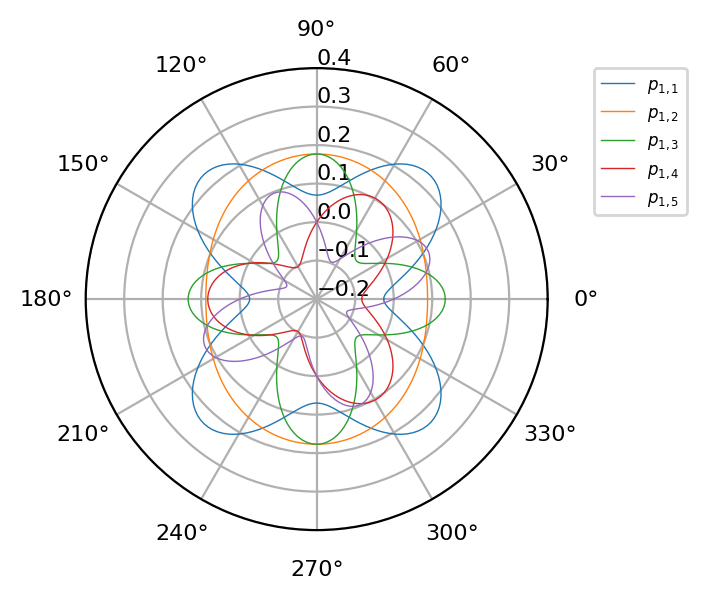

In [52]:
mat_LiNbO3_y.plot_photoelastic_IJ(pref, ("11","12", "13", "14", "15"))

# Piezolectric properties of lithium niobate

Now let's turn to the piezoelectric response of lithium niobate.

This version of lithium niobate has additional piezoelectric quantities defined: the strain piezo coefficient $d_{iJ}$ and the stress piezo coefficient $e_{iJ}$. These are $3\times 6$  tensors with mixed ordinary and Voigt indices.



In [ ]:
import materials
mat_LiNbO3 = materials.make_material("LiNbO3aniso_2021_Steel")


Material: LiNbO3aniso
  File: LiNbO3aniso_2021_Steel
  Source: Steel
  Date: 2021
  Crystal class:  Trigonal
  Crystal group:  no sym

 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[199.2   54.7   70.     7.9    0.     0.  ]
     [ 54.7  199.2   70.    -7.9    0.     0.  ]
     [ 70.    70.   240.     0.     0.     0.  ]
     [  7.9   -7.9    0.    59.9    0.     0.  ]
     [  0.     0.     0.     0.    59.9    7.9 ]
     [  0.     0.     0.     0.     7.9   72.25]]

 Viscosity eta_IJ., unit: dimensionless.
   Voigt 4-tensor:
    [[ 6.547e-04  2.275e-04  2.499e-04 -6.870e-05  0.000e+00  0.000e+00]
     [ 2.275e-04  6.547e-04  2.499e-04  6.870e-05  0.000e+00  0.000e+00]
     [ 2.499e-04  2.499e-04  3.377e-04  0.000e+00  0.000e+00  0.000e+00]
     [-6.870e-05  6.870e-05  0.000e+00  1.765e-04  0.000e+00  0.000e+00]
     [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.765e-04 -6.870e-05]
     [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -6.870e-05  2.136e-04]]

 Photoelasticity p_IJ.

## Piezo slowness curves for x-cut

There are a number of piezoelectric phenomena that involve coupling of the optical field and a material-related polarisation field. Perhaps the most basic effect is a "piezo-stiffening" of the stiffness tensor (a genuinely confusing terminology).
This effect is discussed in Auld volume 1, section 8.F.

To good approximation this is an adjustment to the optical properties only in which the "raw" stiffness tensor $c_{IJ}$ is modified by the piezo influence.

It is described by a change to the Christoffel equation so that the bulk optical modes are altered. The revised Christoffel equation has the form 
$$
q^2 \Gamma_{ij} v_j = \rho \Omega^2 v_i,
$$
where 
$$
\Gamma_{ij} = l_{iK} c_{KL} l_{Lj},
$$
and the matrix $l_{Lj}$ indexed by Voigt ($L$) and Cartesian indices ($j$) is composed of the wavevector components $\vec kappa $:
$$
l_{Lj} = \begin{bmatrix} 
\kappa_x & 0 & 0 \\
0 & \kappa_y & 0  \\
0 & 0& \kappa_z \\
0 & \kappa_z & \kappa_y \\
\kappa_z & 0 & \kappa_x \\
\kappa_y & \kappa_x & 0
\end{bmatrix}.
$$ 
The *piezoelastically stiffened elastic constant* is
$$
c^{p}_{KL}=c^{E}_{KL} + \frac{[e_{Kj} l_j][l_i e_{iL}]}{l_i \epsilon^{S}_{ij} l_j}.
$$



We can explore this for different crystal cuts with piezo effects both disabled and active.

We create a "negative" $x$-axis cut (180 $^\circ$ rotation around the $x$-axis from $x$-cut) to match the parameters of Auld.

In [121]:
mat_LiNbO3 = materials.make_material("LiNbO3_1973_Auld")
#mat_LiNbO3 = materials.make_material("LiNbO3aniso_2021_Steel")

mat_LiNbO3_x = mat_LiNbO3.copy()
mat_LiNbO3_x.disable_piezoelectric_effects()
mat_LiNbO3_x.set_orientation('x-cut')

mat_LiNbO3_negx = mat_LiNbO3.copy()
mat_LiNbO3_negx.set_orientation('negx-cut')

In [122]:
print(mat_LiNbO3_x.elastic_properties())
print('\n\n'+mat_LiNbO3_negx.elastic_properties())

Elastic properties of material LiNbO3_1973_Auld
  Density:        4700.000 kg/m^3
  Ref. index:     2.3000+0.0000j 
  Crystal class:  Trigonal
  Crystal group:  3m
  Stiffness c_IJ:
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[203.0000  53.0000  75.0000  -0.0000   9.0000   0.0000]
     [ 53.0000 203.0000  75.0000   0.0000  -9.0000  -0.0000]
     [ 75.0000  75.0000 245.0000   0.0000   0.0000   0.0000]
     [ -0.0000   0.0000   0.0000  60.0000   0.0000  -9.0000]
     [  9.0000  -9.0000   0.0000   0.0000  60.0000  -0.0000]
     [  0.0000  -0.0000   0.0000  -9.0000  -0.0000  75.0000]]

  Wave mode 1: v_p=7.2199 km/s,  |v_g|=7.2199 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  7.2199] km/s
  Wave mode 2: v_p=3.5729 km/s,  |v_g|=3.6129 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[ 0.5359 -0.0000  3.5729] km/s
  Wave mode 3: v_p=3.5729 km/s,  |v_g|=3.6129 km/s,  u_j=[ 0.0000  1.0000  0.0000],  v_g=[-0.5359  0.0000  3.5729] km/s

 Piezoelectric properties:
  Piezo effects

Observe the difference in the crystal orientations:

In [123]:
fimg1 = mat_LiNbO3_x.make_crystal_axes_plot('ttx')
fimg2 = mat_LiNbO3_negx.make_crystal_axes_plot('ttnegx')
img_pair(fimg1, fimg2, 'Standard orientation', 'Flipped orientation')

In [ ]:
imgoffxx = mat_LiNbO3_x.plot_bulk_dispersion_ivp("ghhtmp_xcut_piezo_off", show_poln=True, flip_x=True)
img_pair(imgoffxx, "images/auld_fig8_9.png",  'NumBAT', 'Auld Fig. 8.9', 400, 300)


(np.float64(-0.31928792661606376), np.float64(0.31928792661606376)) (np.float64(-0.31928792661606376), np.float64(0.31928792661606376))


With piezo effects disabled, the slowness curve (top right) in the first plot corresponds to Fig. 8.9 in Auld volume 1.

In [153]:
imgoffx = mat_LiNbO3_x.plot_bulk_dispersion("tmp_xcut_piezo_off", show_poln=False, passive_rot=False)
imgoffxb = mat_LiNbO3_x.plot_bulk_dispersion("tmp_xcutb_piezo_off", show_poln=False, passive_rot=True)

imgoffxn = mat_LiNbO3_negx.plot_bulk_dispersion("tmp_negxcut_piezo_off", show_poln=False,
                                                passive_rot=False)

img_pair(imgoffx, "images/auld_fig8_9.png",  'NumBAT', 'Auld Fig. 8.9', 350, 300)
img_pair(imgoffxb, imgoffxn,  'NumBAT', 'Auld Fig. 8.9', 350, 300)



abscta Axes(0.5125,0.55234;0.3875x0.32766)
slowing 1
slowing 1
slowing 1
lwoing 2
lwoing 3
lwoing 3
lwoing 3
lwoing 3
lwoing 3
lwoing 3
lwoing 3
lwoing 3
abscta Axes(0.5125,0.55234;0.3875x0.32766)
slowing 1
slowing 1
slowing 1
lwoing 2
lwoing 3
lwoing 3
lwoing 3
lwoing 3
lwoing 3
lwoing 3
lwoing 3
lwoing 3
abscta Axes(0.5125,0.55234;0.3875x0.32766)
slowing 1
slowing 1
slowing 1
lwoing 2
lwoing 3
lwoing 3
lwoing 3
lwoing 3
lwoing 3
lwoing 3
lwoing 3
lwoing 3


In [ ]:

imgoff2 = mat_LiNbO3_negx.plot_bulk_dispersion("tmp_negxcut_piezo_off", show_poln=False)


img_pair(imgoff2, "images/auld_fig8_10.png",  'NumBAT', 'Auld Fig. 8.10', 350, 300)

In [ ]:
img_pair("images/auld_fig8_11.png",imgoff1, 'Auld Fig. 8.11p', 'NumBAT', 300, 350)



The slowness curve in the second plot with piezo effects enabled corresponds to Fig. 8.11 in Auld volume 1.


In [ ]:
mat_LiNbO3_negx.enable_piezoelectric_effects()
imgoff2 = mat_LiNbO3_negx.plot_bulk_dispersion("tmp_negxcut_piezo_off", show_poln=False)

display(Image(imgoff1, width=500),Image(imgoff2, width=500))

In [62]:
imgoff1

'tmp_xcut_piezo_off-bulkdisp.png'

This should give Auld Fig. 8.11.

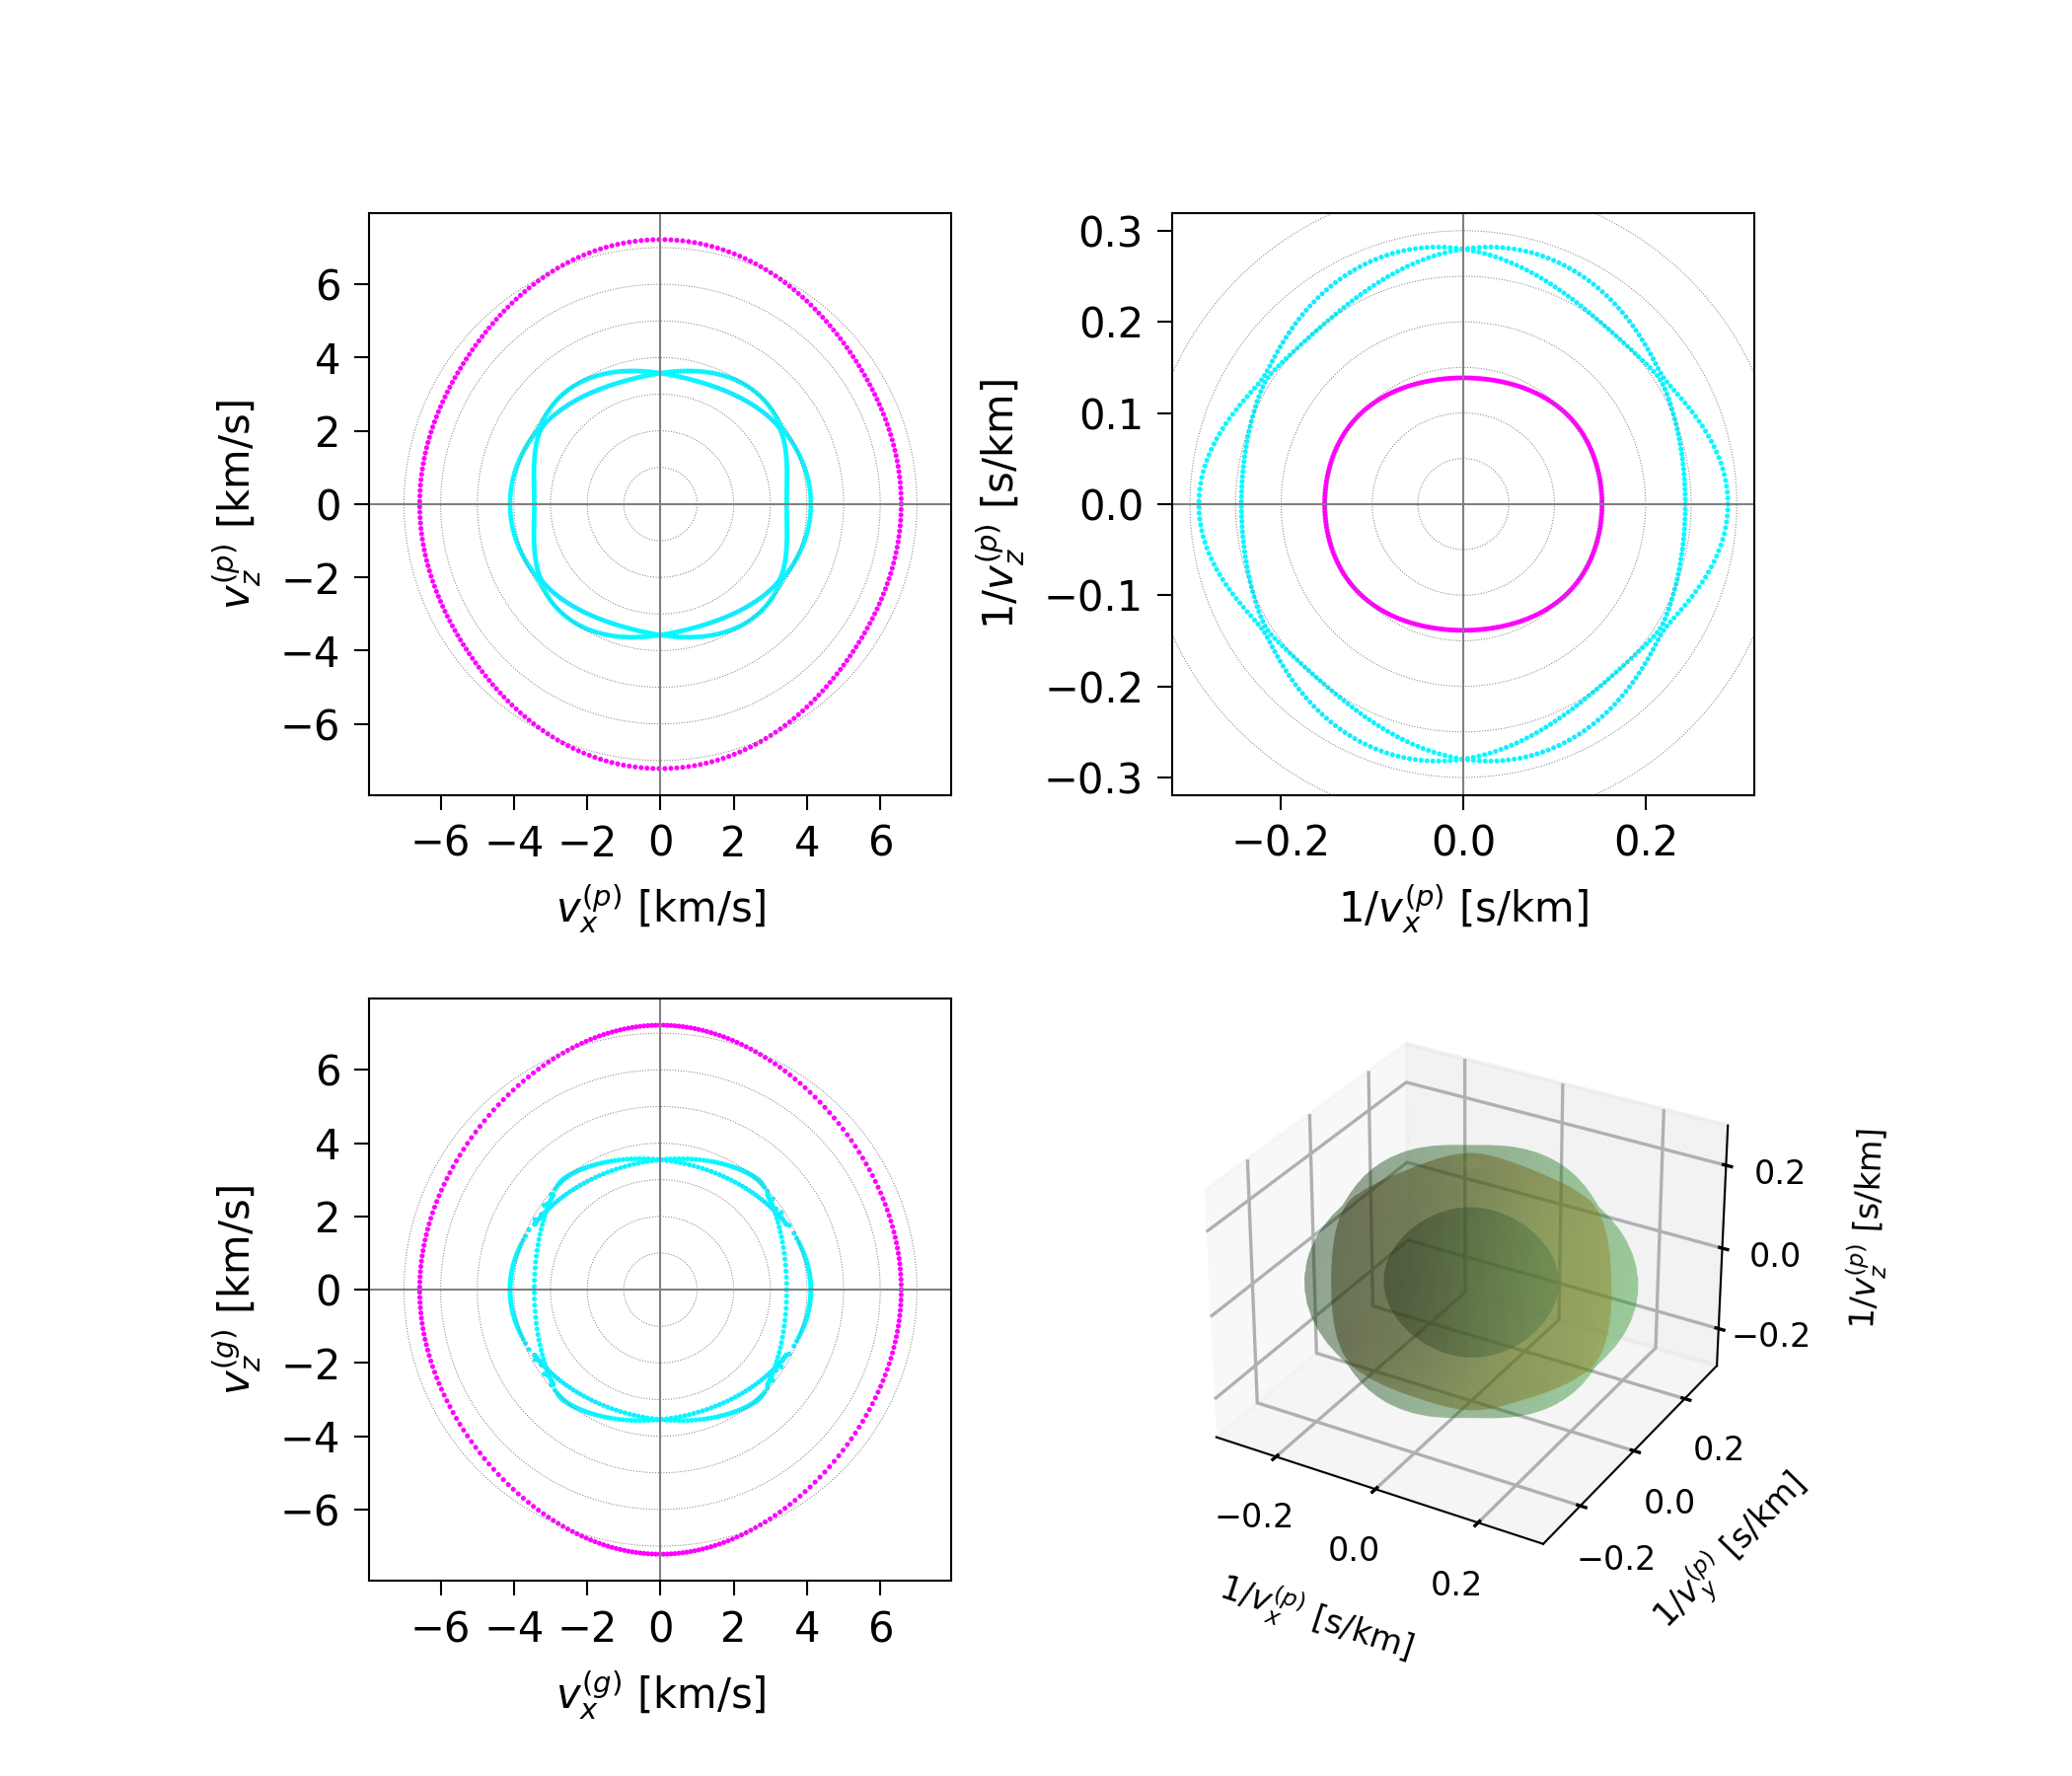

In [ ]:
mat_LiNbO3_negx.enable_piezoelectric_effects()
imgon = mat_LiNbO3_negx.plot_bulk_dispersion("tmp_negxcut_piezo_on", show_poln=False)
display(Image(imgon, width=500))

This should give Auld Fig. 8.12.

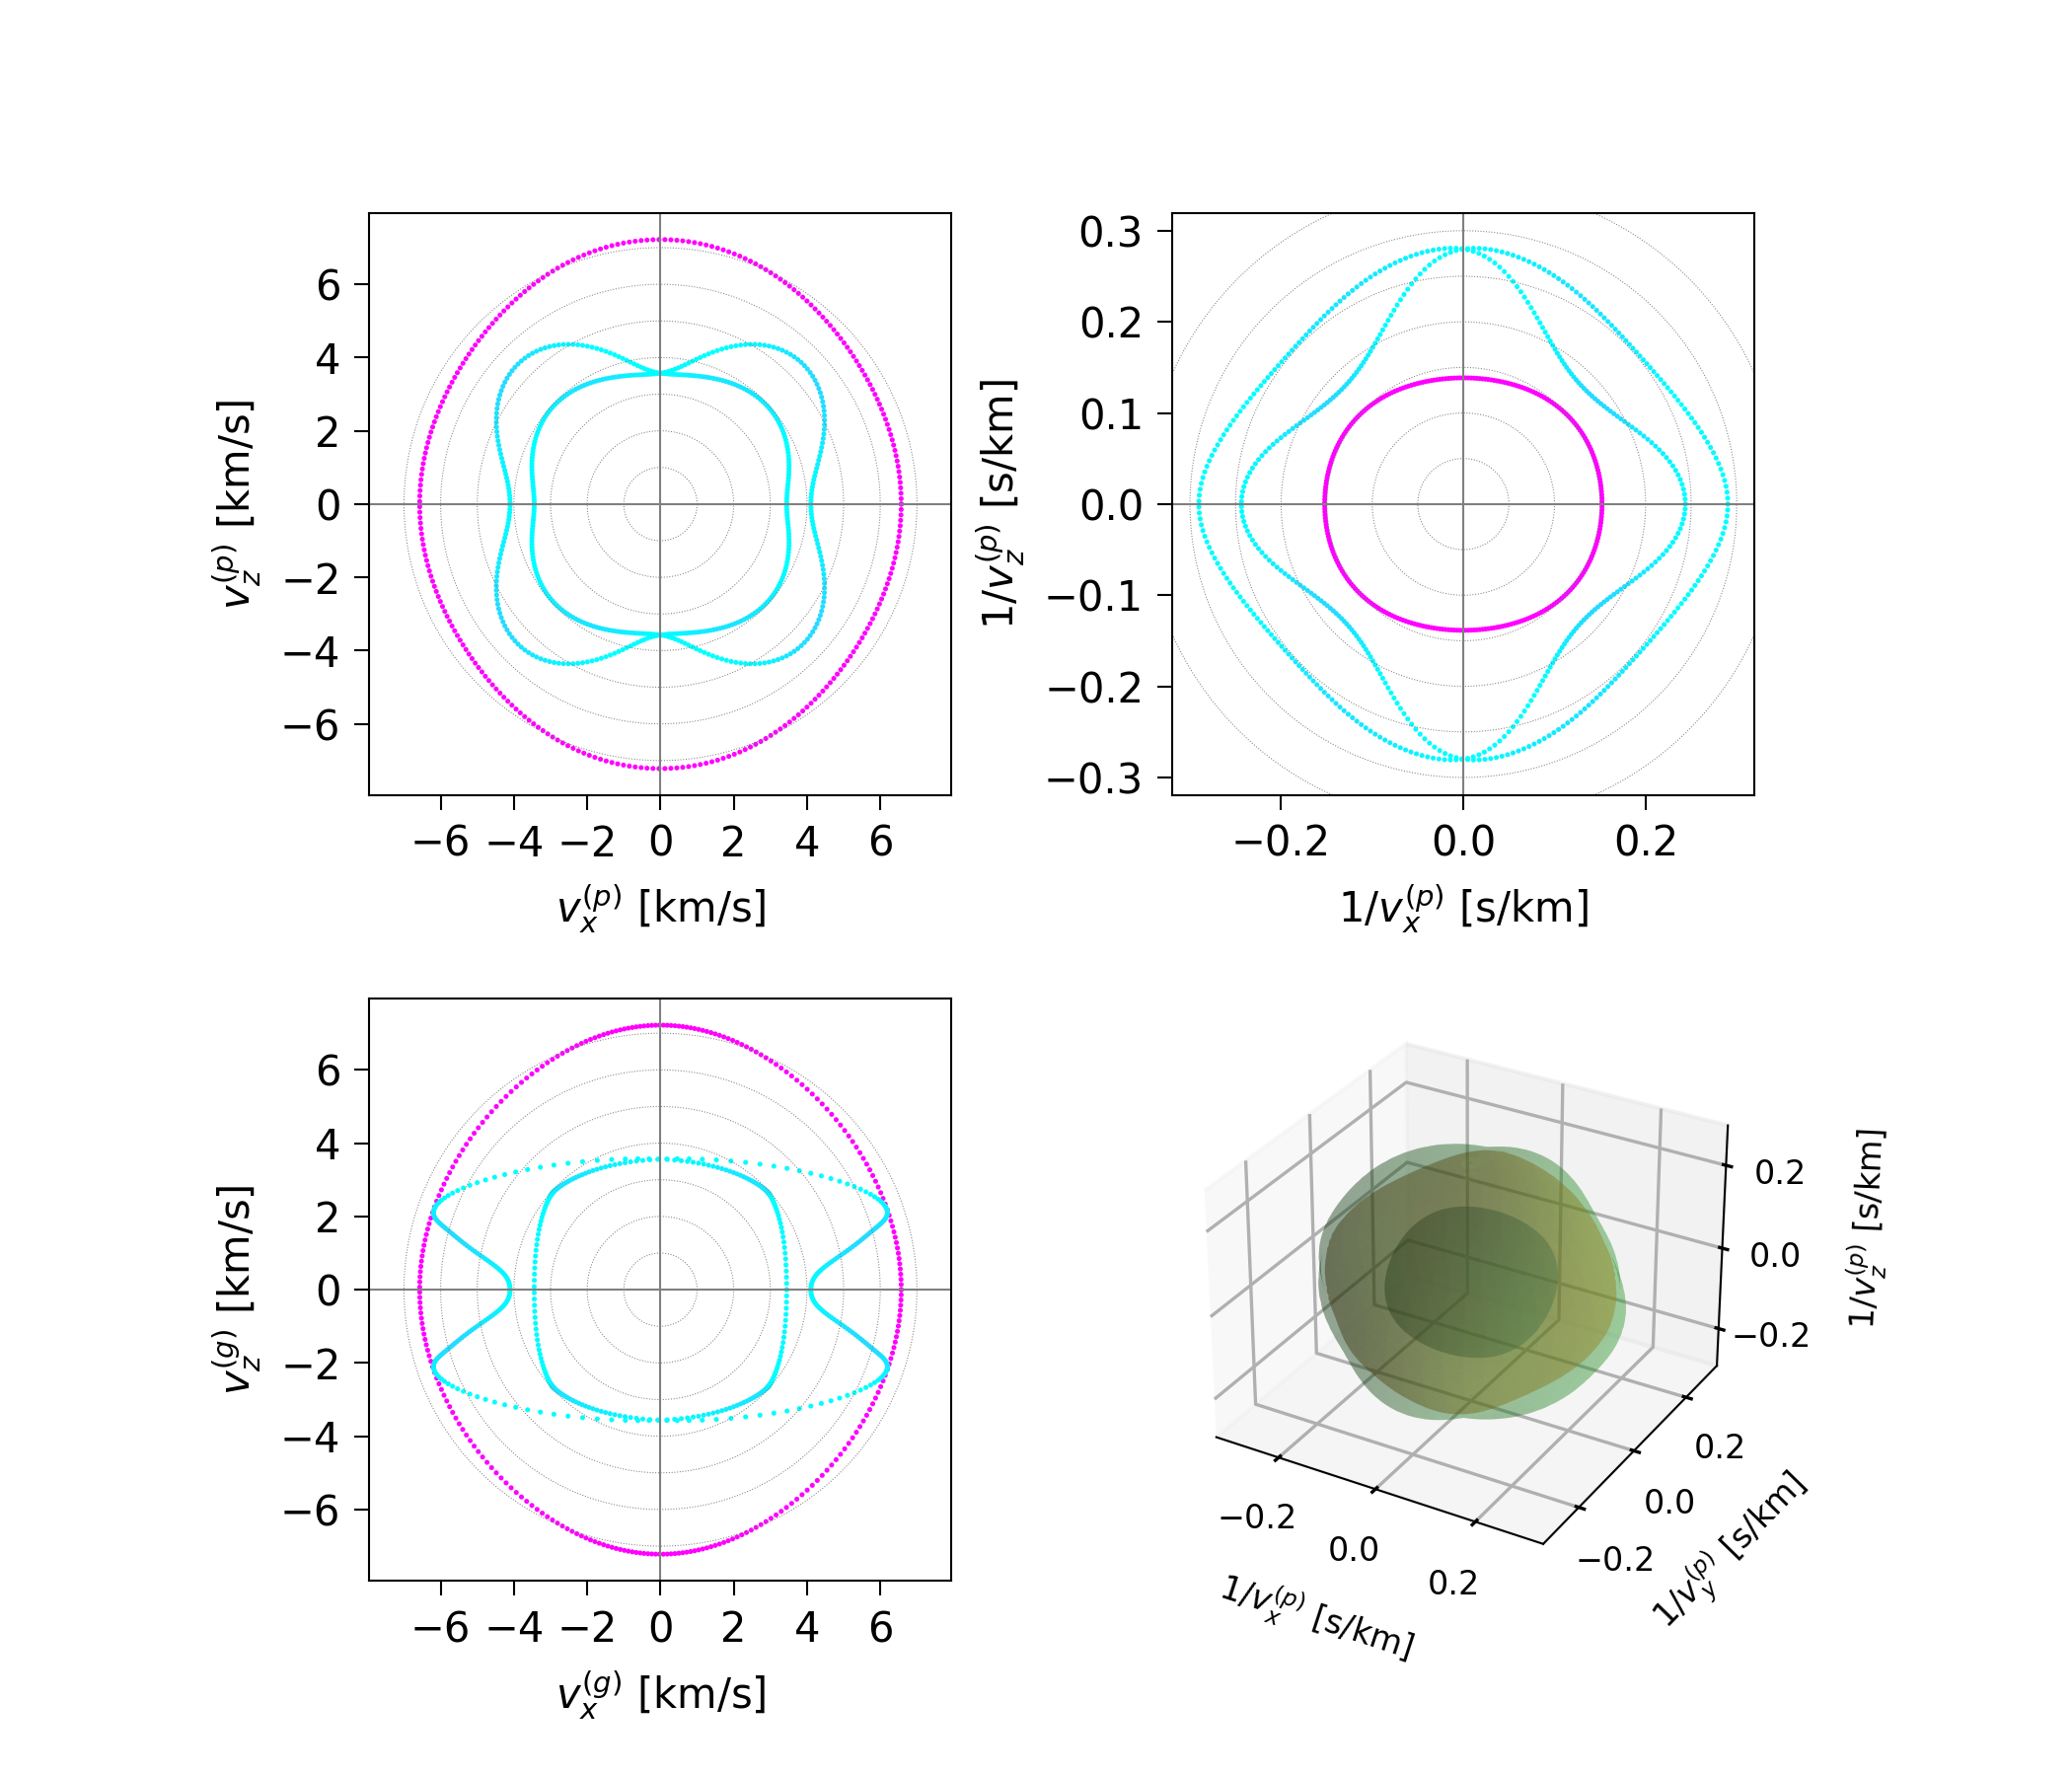

In [191]:
mat_LiNbO3_z = mat_LiNbO3.copy()
mat_LiNbO3_z.set_orientation('z-cut')

mat_LiNbO3_z.enable_piezoelectric_effects()
imgon = mat_LiNbO3_z.plot_bulk_dispersion("tmp_negxcut_piezo_on", show_poln=False)
display(Image(imgon, width=500))

# Other material comparisons

Cubic material: GaAs

In [171]:
mat_GaAs = materials.make_material("GaAs_1970_Auld")

The slowness plot (top-right) below reproduces Fig. 7.2 of Auld vol. 1, while
the ray surface plot (lower-left) reproduces Fig. 7.9.

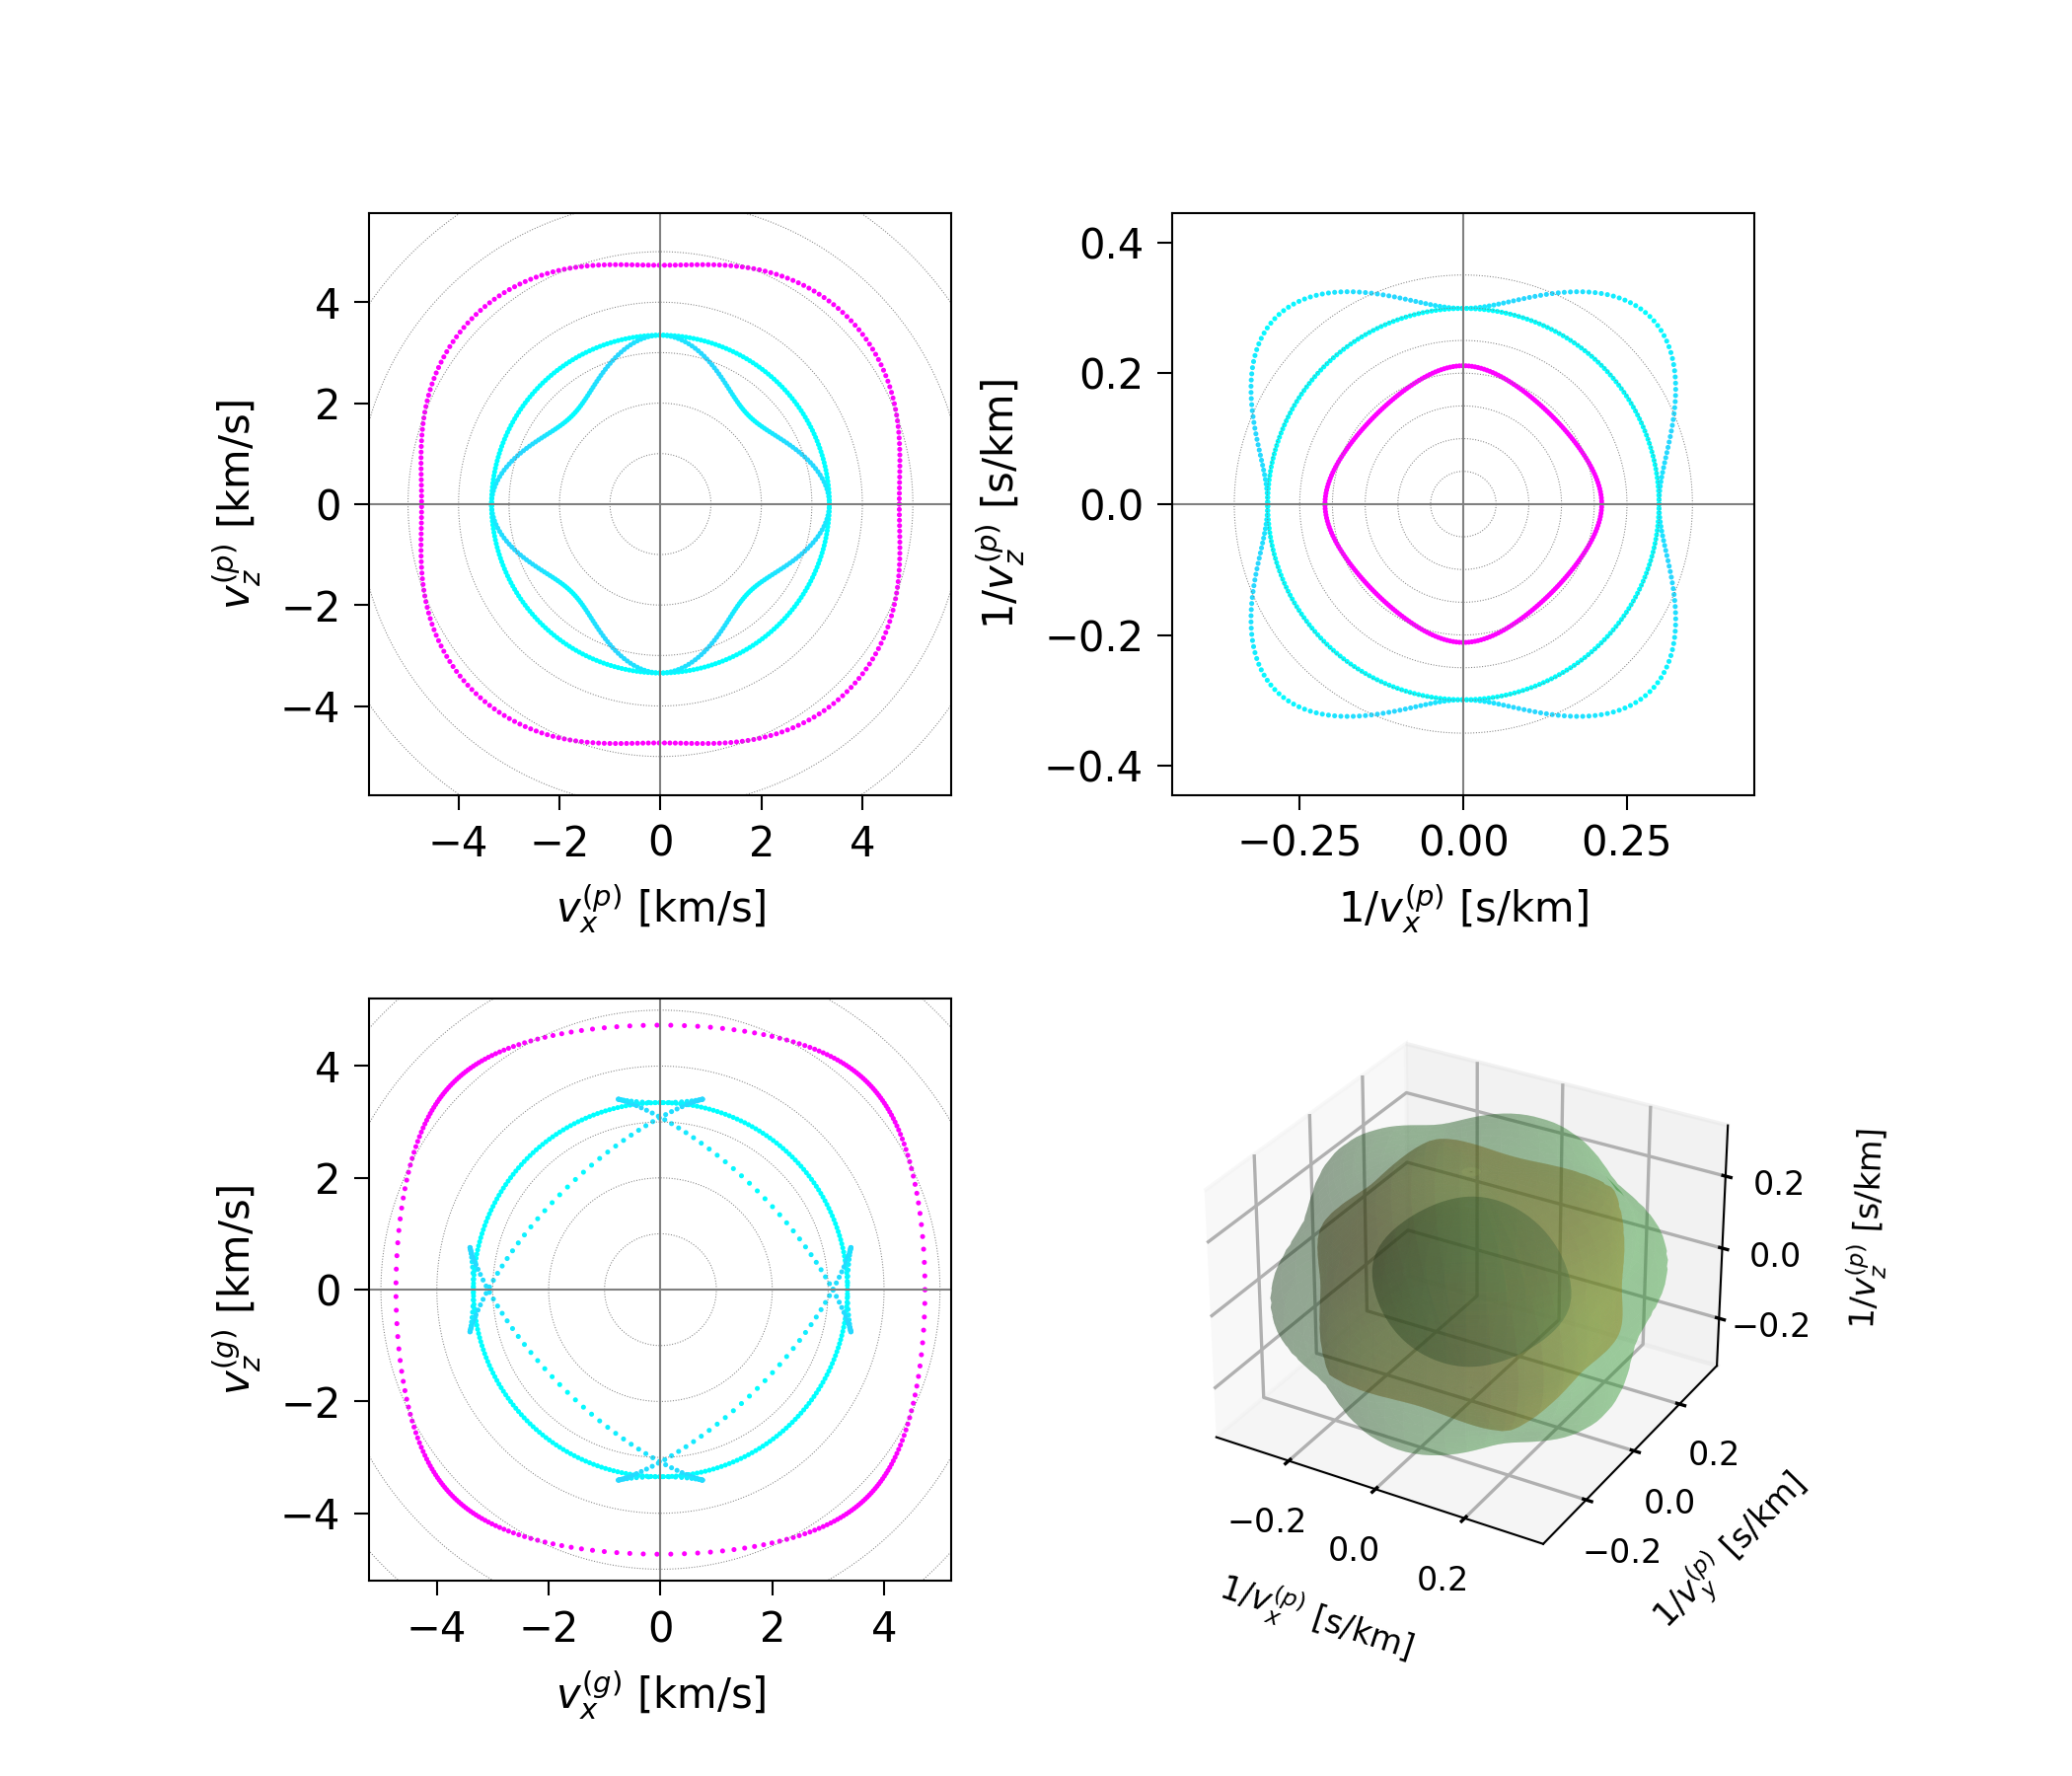

In [172]:
mat_GaAs.disable_piezoelectric_effects()

fimg = mat_GaAs.plot_bulk_dispersion("tmp_defcut", show_poln=False)
display(Image(fimg, width=500))

Now let's reproduce Fig. 7.3.
To preserve the $z$ axis, rotate $[1,-1,0]$ into the $x$ axis and $[1,-1,1]$ into the horizontal plane, 
we need a $\pi/4$ rotation around $z$: 

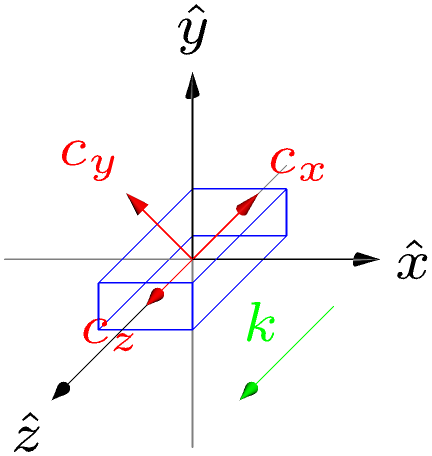

In [173]:
mat_rot = mat_GaAs.copy()
mat_rot.rotate([0,0,1], np.pi/4)
fimg = mat_rot.make_crystal_axes_plot('ttx')
display(Image(fimg, width=300))

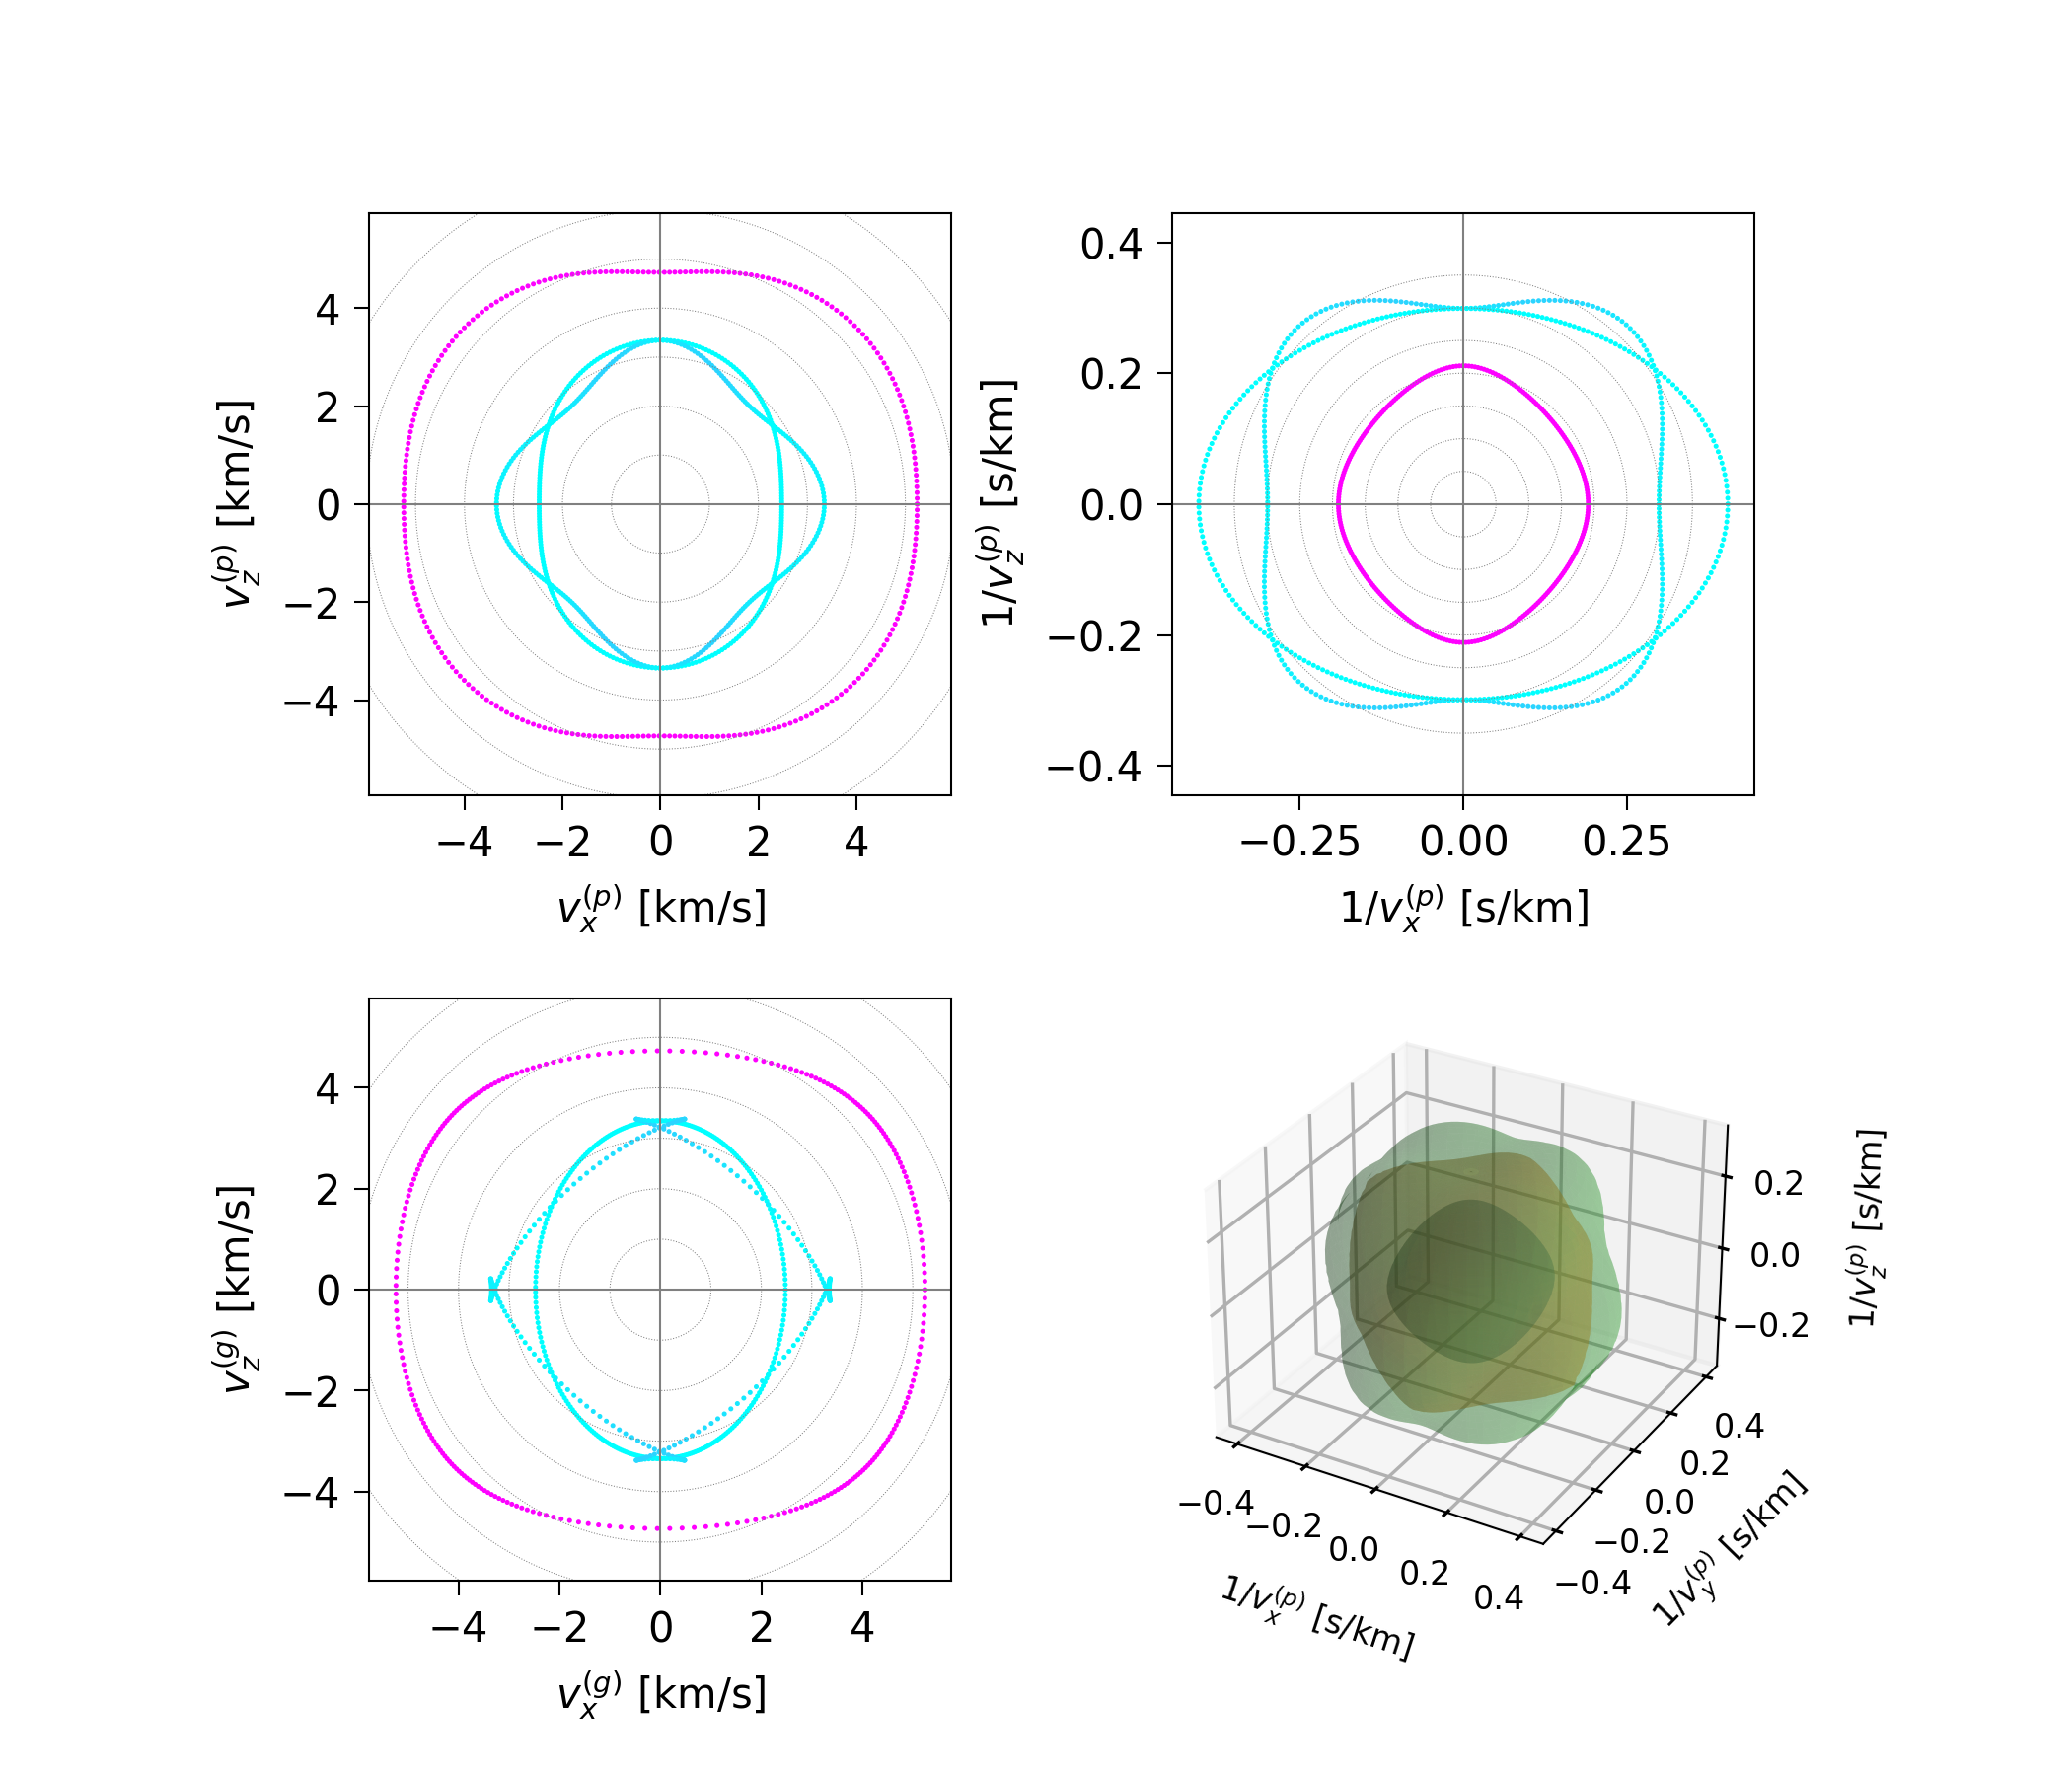

In [174]:
fimg = mat_rot.plot_bulk_dispersion("tmp_defcut", show_poln=False)
display(Image(fimg, width=800))

Hexagonal material: Cadmium sulfide

In [185]:
mat_CdS = materials.make_material("CdS_1973_Auld")
mat_CdS.set_orientation('z-cut')
#print(mat_CdS.full_str())

We rotate to the $z$-cut orientation to get a dispersion cut through the horizontal symmetry plane.

The slowness curve (top-right) then reproduces Auld Fig. 7.6.

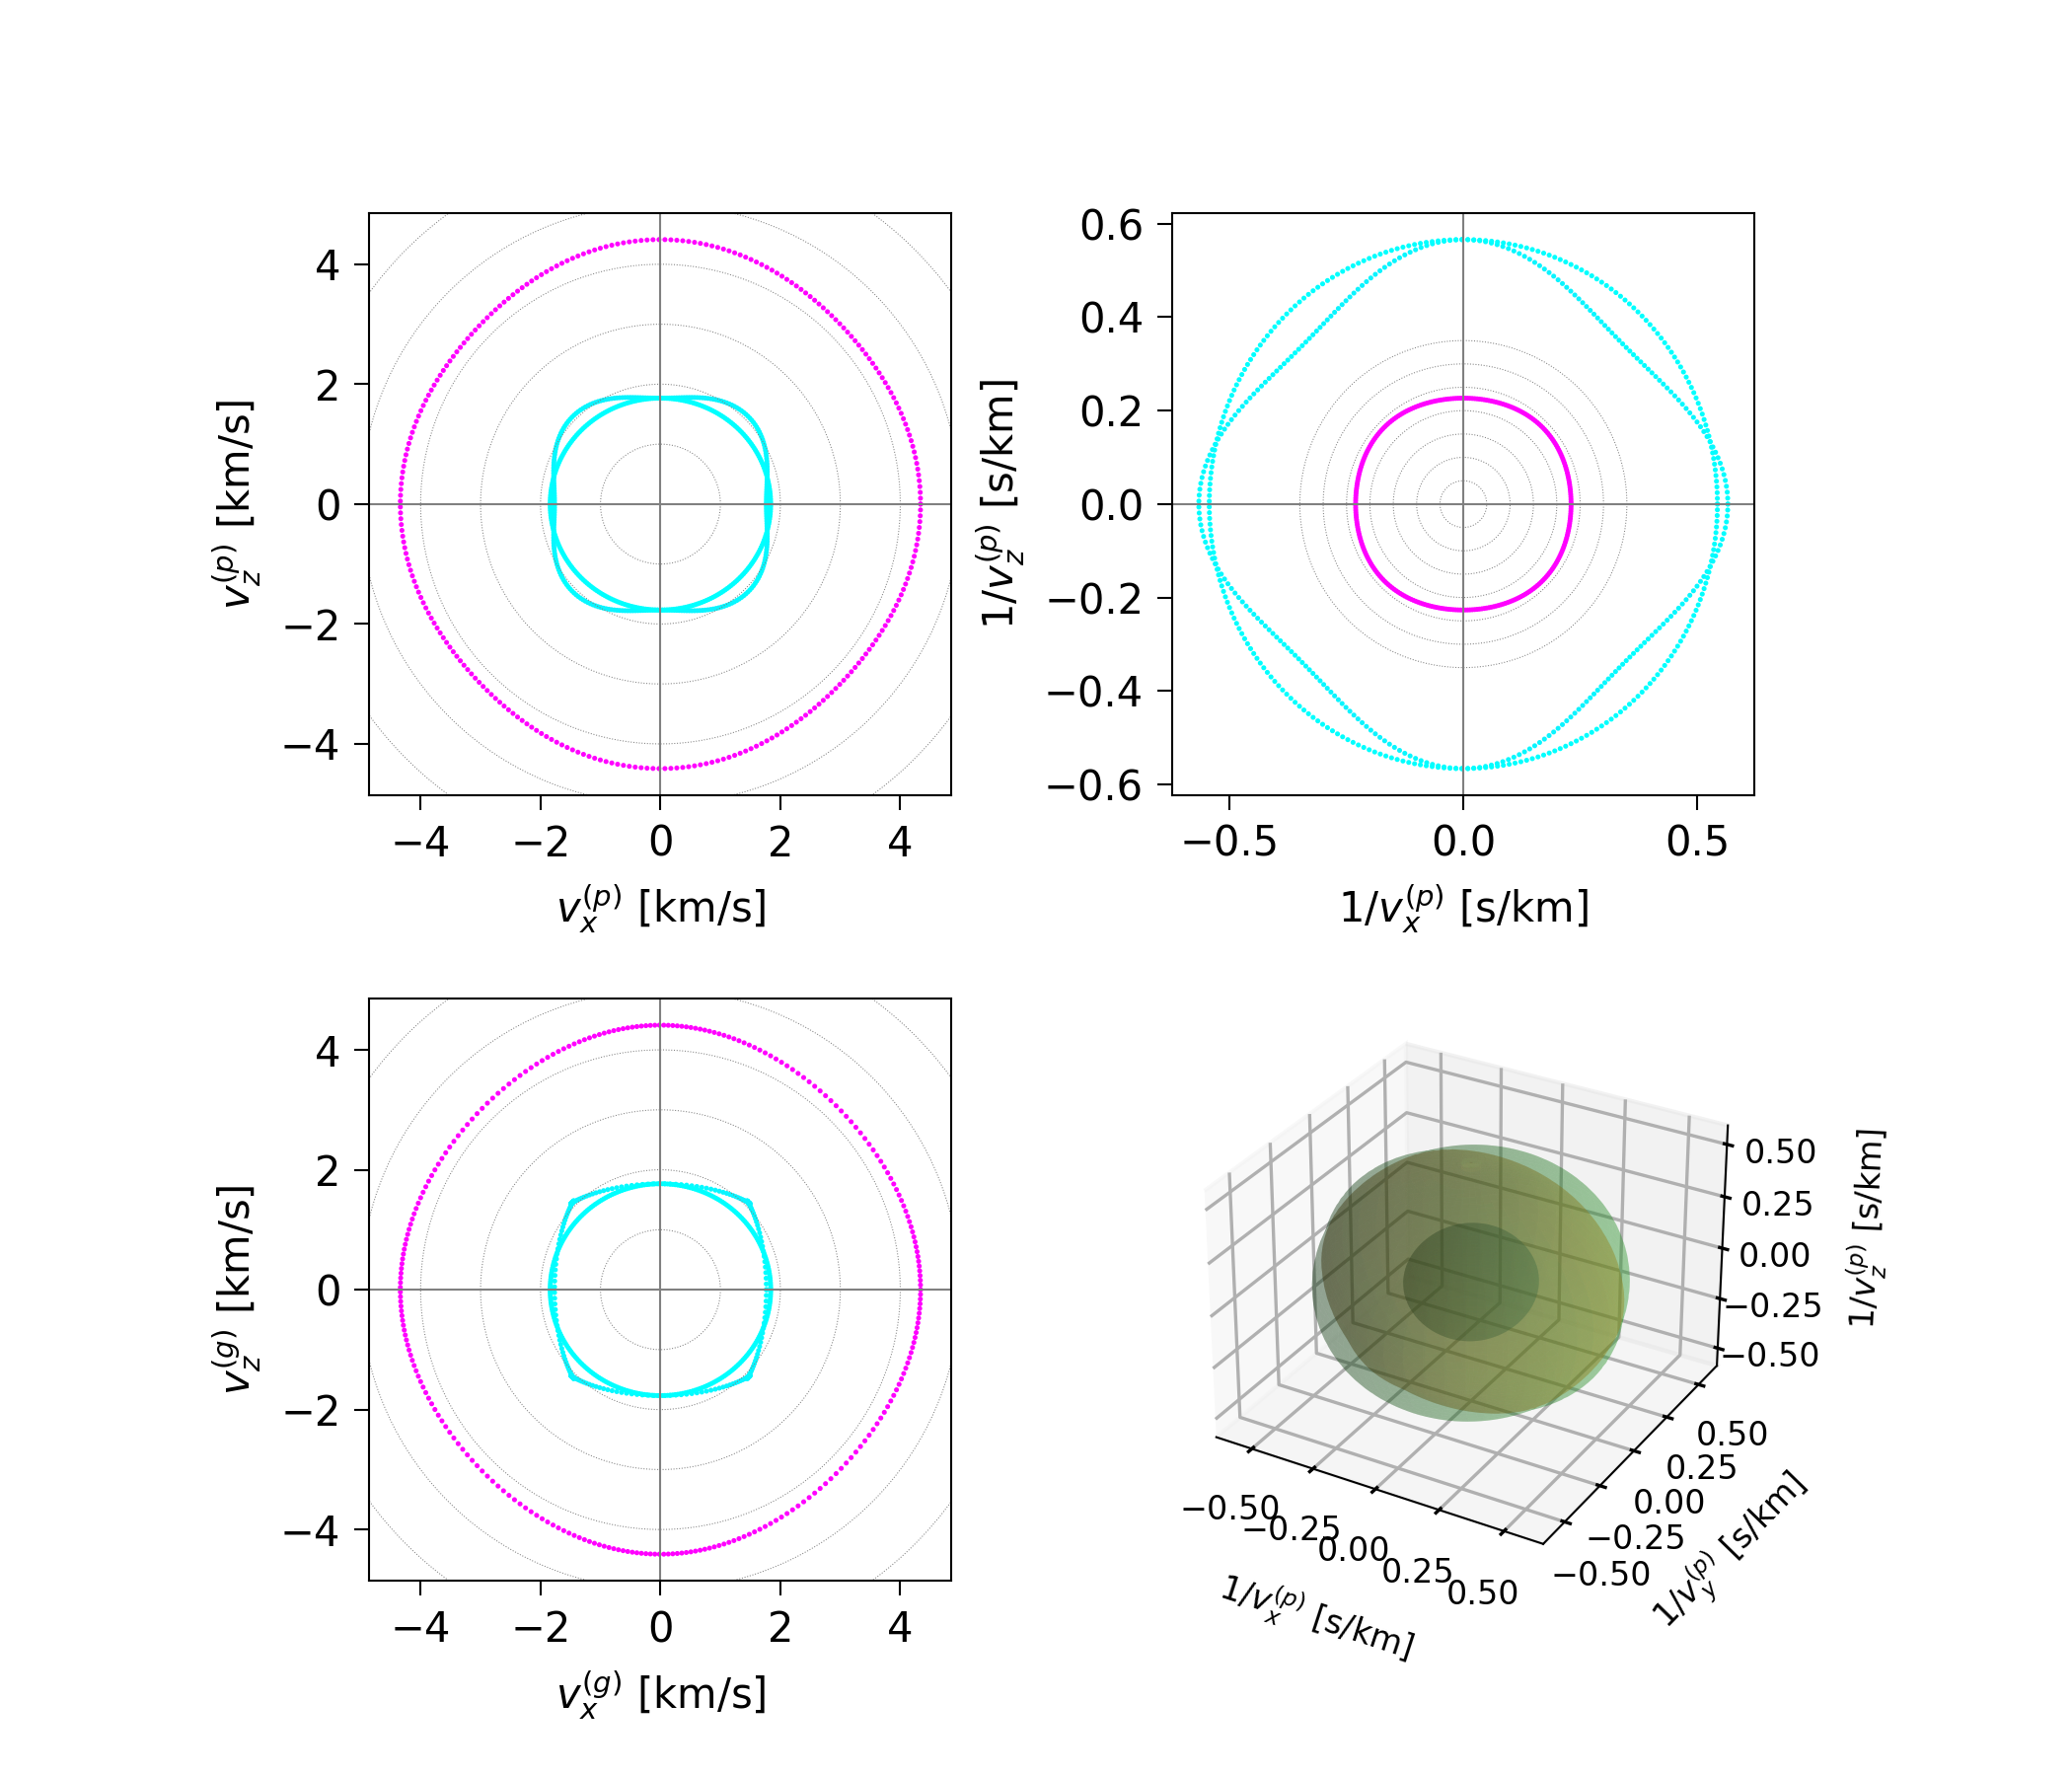

In [187]:
mat_CdS.set_orientation('z-cut')
fimg = mat_CdS.plot_bulk_dispersion("tmp_defcut", show_poln=False)
display(Image(fimg, width=600))